# 1. Google drive Mount

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# 2. Define Directory

In [ ]:
# 사용하기 전 변경해주어야 하는 파라미터
BASE_WORKING_DIR = "/content/gdrive/My Drive/weather_bigcontest/4_code/"
# BASE_WORKING_DIR = "/content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/"
USERNAME = "sangwook"

In [ ]:
import os
# 사용하는 디렉토리 정의
DATA_BASE_PATH = os.path.join(BASE_WORKING_DIR, "data")
DATA_RAW_PATH = os.path.join(DATA_BASE_PATH, "raw")
DATA_EXPORT_PATH = os.path.join(DATA_BASE_PATH, "export")
DATA_CONV_USER_PATH = os.path.join(DATA_BASE_PATH, USERNAME)
DATA_CONV_PATH = os.path.join(DATA_BASE_PATH, "converted")
WORKING_DIR = os.path.join(BASE_WORKING_DIR, USERNAME)

print('Current Work Directory :',  os.getcwd(), '\n')
print('Username :',  USERNAME, '\n')

Current Work Directory : /content 

Username : sangwook 



In [ ]:
# 데이터 무엇이 있는지 확인하자.
# 아래 코드를 수행하게 되면, "../input/"에서 리눅스 명령어 "ls"를 수행한 결과를 보여주게 된다. 이 때 나온 binary code를 "utf8"로 디코딩해서 보여준다.
from subprocess import check_output
print("===== Raw Data List =====\n", check_output(["ls", DATA_RAW_PATH]).decode("utf8"))
print("===== Export Data List =====\n" ,check_output(["ls", DATA_EXPORT_PATH]).decode("utf8"))
print("===== Converted User Data List =====\n" ,check_output(["ls", DATA_CONV_USER_PATH]).decode("utf8"))
print("===== Converted Data List =====\n" ,check_output(["ls", DATA_CONV_PATH]).decode("utf8"))

===== Raw Data List =====
 plant1_train.csv
plant2_train.csv
plant2_train.gsheet
plant_test.csv
submit.csv
submit.gsheet

===== Export Data List =====
 dangjin_aws
seosan_asos
sinpyeong_aws
songak_forecast
songak_local
songsan_forecast
songsan_local

===== Converted User Data List =====
 SURFACE_AWS_616_HR_2016.csv
SURFACE_AWS_616_HR_2017.csv
SURFACE_AWS_616_HR_2018.csv
SURFACE_AWS_616_HR_2019.csv
SURFACE_AWS_637_HR_2016.csv
SURFACE_AWS_637_HR_2017.csv
SURFACE_AWS_637_HR_2018.csv
SURFACE_AWS_637_HR_2019.csv

===== Converted Data List =====
 auc_95_temp_save
dangjin_weather.csv
data_all_time_out.csv
data_all_time_out_in.csv
data_all_time_predict.csv
date_trend_point.csv
old_local
plant1_by_loc_with_datetime.csv
plant2_by_loc_with_datetime.csv
plant_test_all_weather_feature_add_cluster_add_out.csv
plant_test_all_weather_feature_add_cluster_add_out_in.csv
plant_test_all_weather_feature_add_cluster.csv
plant_test_all_weather_feature.csv
plant_test_with_datetime.csv
plant_train_all_weather_

# 4. Import Library

In [ ]:
# 기본 데이터 라이브러리 로드
import sys # 시스템 파라미터에 접근할 수 있게 도와준다.
print("Python version: {}". format(sys.version))

import pandas as pd # 데이터 정제에 도움을 주는 라이브러리
print("pandas version: {}". format(pd.__version__))

import matplotlib # 매트랩에서 사용하는 시각화 도구를 사용할 수 있게 도와주는 시각화 도구
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np # 행렬 계산을 위해 필요한 라이브러리
print("NumPy version: {}". format(np.__version__))

import scipy as sp # 수학 관련 함수가 내장된 라이브러리
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display # 주피터 노트북에서 예쁘게 시각화 해주는 도구
print("IPython version: {}". format(IPython.__version__)) 

import sklearn # 각종 통계 도구와 머신 러닝 알고리즘이 내장되어 있는 라이브러리
print("scikit-learn version: {}". format(sklearn.__version__))

# 파이썬 내장 라이브러리
import random
import datetime
import time
import os


# Jupyter Notebook 이나 ipython 을 사용하다보면 향후 버전이 올라갈 때 변경될 사항 등을 알려주는 경고 메시지(warning message)를 뜨지 않게 해준다.
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
pandas version: 1.0.5
matplotlib version: 3.2.2
NumPy version: 1.18.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 0.22.2.post1
-------------------------


In [ ]:
# 모델링 라이브러리, 수학 계산 툴 로드
# 일반적인 모델링 라이브러리
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# 모델링 시 헬퍼 함수들
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# 시각화 도구
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# 시각화 도구 default 세팅
# 주피터 노트북에서 plot 결과를 볼 수 있게 해준다.
%matplotlib inline
mpl.style.use('ggplot') # matplotlib에서 plot되는 결과를 선택할 수 있다.
sns.set_style('white') # seaborn에서 사용할 style을 설정할 수 있다.
pylab.rcParams['figure.figsize'] = 12,8 # plot의 크기와 선 등의 기본 값을 설정할 수 있다.

# 시각화 Style 설정하기
# print(plt.style.available)
# ['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']

plt.style.use(['fivethirtyeight'])
sns.set_style('darkgrid')

# 분산분석
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Import Data

In [ ]:
# 데이터 불러오기
data_plant1 = pd.read_csv(os.path.join(DATA_CONV_PATH, "plant1_by_loc_with_datetime.csv"))
data_plant2 = pd.read_csv(os.path.join(DATA_CONV_PATH, "plant2_by_loc_with_datetime.csv"))
data_val = pd.read_csv(os.path.join(DATA_CONV_PATH, "plant_test_with_datetime.csv"))

# unnamed: 0 제거
data_plant1.drop(['Unnamed: 0'], axis='columns', inplace=True)
data_plant2.drop(['Unnamed: 0'], axis='columns', inplace=True)
data_val.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [ ]:
# 확인
data_plant1
# data_plant1_loc1 = data_plant1[data_plant1["loc"] == 1]

,mea_ddhr,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc,hum_out_loc,cond_loc,date,time
0,2016-04-01 00:00:00,1.0,1.0,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-01,0.0
1,2016-04-01 00:00:00,1.0,2.0,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-01,0.0
2,2016-04-01 00:00:00,1.0,3.0,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-01,0.0
3,2016-04-01 03:00:00,1.0,1.0,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-01,180.0
4,2016-04-01 03:00:00,1.0,2.0,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-01,180.0
...,...,...,...,...,...,...,...,...,...,...,...
175107,2019-03-31 23:40:00,1.0,2.0,10.55,36.08,11.21,6.31,45.33,0.0,2019-03-31,1420.0
175108,2019-03-31 23:40:00,1.0,3.0,9.82,38.95,9.83,6.31,45.33,0.0,2019-03-31,1420.0
175109,2019-03-31 23:50:00,1.0,1.0,10.49,38.74,10.52,6.34,45.94,0.0,2019-03-31,1430.0
175110,2019-03-31 23:50:00,1.0,2.0,10.55,36.69,11.01,6.34,45.94,0.0,2019-03-31,1430.0


In [ ]:
data_plant1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175112 entries, 0 to 175111
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   mea_ddhr     175112 non-null  object 
 1   plant        175112 non-null  float64
 2   loc          175112 non-null  float64
 3   tem_in       175112 non-null  float64
 4   hum_in       175112 non-null  float64
 5   tem_coil     175112 non-null  float64
 6   tem_out_loc  175112 non-null  float64
 7   hum_out_loc  175112 non-null  float64
 8   cond_loc     175112 non-null  float64
 9   date         175112 non-null  object 
 10  time         175112 non-null  float64
dtypes: float64(9), object(2)
memory usage: 14.7+ MB


In [ ]:
data_plant2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175254 entries, 0 to 175253
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   mea_ddhr     175254 non-null  object 
 1   plant        175254 non-null  float64
 2   loc          175254 non-null  float64
 3   tem_in       175254 non-null  float64
 4   hum_in       175254 non-null  float64
 5   tem_coil     175254 non-null  float64
 6   tem_out_loc  175254 non-null  float64
 7   hum_out_loc  175254 non-null  float64
 8   cond_loc     175254 non-null  float64
 9   date         175254 non-null  object 
 10  time         175254 non-null  float64
dtypes: float64(9), object(2)
memory usage: 14.7+ MB


In [ ]:
# year, month, day 만들기
data_plant1[['year', 'month', 'day']] = pd.DataFrame(data_plant1.date.str.split('-', 2).tolist())
data_plant2[['year', 'month', 'day']] = pd.DataFrame(data_plant2.date.str.split('-', 2).tolist())

# int 로 바꿔주기
data_plant1['year'] = data_plant1['year'].astype(int)
data_plant1['month'] = data_plant1['month'].astype(int)
data_plant1['day'] = data_plant1['day'].astype(int)

data_plant2['year'] = data_plant2['year'].astype(int)
data_plant2['month'] = data_plant2['month'].astype(int)
data_plant2['day'] = data_plant2['day'].astype(int)

# date datetime 
data_plant1['date'] = data_plant1['date'].apply(lambda x : datetime.datetime.strptime(x + " 00:00:00", '%Y-%m-%d %H:%M:%S').date())
data_plant2['date'] = data_plant2['date'].apply(lambda x : datetime.datetime.strptime(x + " 00:00:00", '%Y-%m-%d %H:%M:%S').date())
data_val = data_val['date'].apply(lambda x : datetime.datetime.strptime(x + " 00:00:00", '%Y-%m-%d %H:%M:%S').date())

data_plant1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175112 entries, 0 to 175111
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   mea_ddhr     175112 non-null  object 
 1   plant        175112 non-null  float64
 2   loc          175112 non-null  float64
 3   tem_in       175112 non-null  float64
 4   hum_in       175112 non-null  float64
 5   tem_coil     175112 non-null  float64
 6   tem_out_loc  175112 non-null  float64
 7   hum_out_loc  175112 non-null  float64
 8   cond_loc     175112 non-null  float64
 9   date         175112 non-null  object 
 10  time         175112 non-null  float64
 11  year         175112 non-null  int64  
 12  month        175112 non-null  int64  
 13  day          175112 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 18.7+ MB


In [ ]:
# 1공장, 2공장 통합 데이터 만들기
data_plant_total = pd.concat([data_plant1, data_plant2], ignore_index=True)
data_plant_total

,mea_ddhr,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc,hum_out_loc,cond_loc,date,time,year,month,day
0,2016-04-01 00:00:00,1.0,1.0,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-01,0.0,2016,4,1
1,2016-04-01 00:00:00,1.0,2.0,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-01,0.0,2016,4,1
2,2016-04-01 00:00:00,1.0,3.0,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-01,0.0,2016,4,1
3,2016-04-01 03:00:00,1.0,1.0,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-01,180.0,2016,4,1
4,2016-04-01 03:00:00,1.0,2.0,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-01,180.0,2016,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350361,2019-03-31 23:30:00,2.0,2.0,9.05,38.13,9.76,4.57,51.47,0.0,2019-03-31,1410.0,2019,3,31
350362,2019-03-31 23:30:00,2.0,3.0,8.32,39.13,9.49,4.57,51.47,0.0,2019-03-31,1410.0,2019,3,31
350363,2019-03-31 23:40:00,2.0,1.0,8.99,37.33,9.15,4.47,53.14,0.0,2019-03-31,1420.0,2019,3,31
350364,2019-03-31 23:40:00,2.0,2.0,9.02,38.49,9.68,4.47,53.14,0.0,2019-03-31,1420.0,2019,3,31


In [ ]:
data_plant_total["tem_in_coil_diff"] = data_plant_total["tem_in"] - data_plant_total["tem_coil"]
data_plant_total

,mea_ddhr,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc,hum_out_loc,cond_loc,date,time,year,month,day,tem_in_coil_diff
0,2016-04-01 00:00:00,1.0,1.0,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-01,0.0,2016,4,1,5.00
1,2016-04-01 00:00:00,1.0,2.0,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-01,0.0,2016,4,1,3.00
2,2016-04-01 00:00:00,1.0,3.0,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-01,0.0,2016,4,1,3.00
3,2016-04-01 03:00:00,1.0,1.0,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-01,180.0,2016,4,1,4.00
4,2016-04-01 03:00:00,1.0,2.0,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-01,180.0,2016,4,1,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350361,2019-03-31 23:30:00,2.0,2.0,9.05,38.13,9.76,4.57,51.47,0.0,2019-03-31,1410.0,2019,3,31,-0.71
350362,2019-03-31 23:30:00,2.0,3.0,8.32,39.13,9.49,4.57,51.47,0.0,2019-03-31,1410.0,2019,3,31,-1.17
350363,2019-03-31 23:40:00,2.0,1.0,8.99,37.33,9.15,4.47,53.14,0.0,2019-03-31,1420.0,2019,3,31,-0.16
350364,2019-03-31 23:40:00,2.0,2.0,9.02,38.49,9.68,4.47,53.14,0.0,2019-03-31,1420.0,2019,3,31,-0.66


In [ ]:
# 날짜, 공장, loc마다 일교차를 만들어주는 함수
import datetime

def get_slope_df(df, where):
  colList = ["date", "plant", "loc", "tem_in_avg_slope", "hum_in_avg_slope", "tem_coil_avg_slope", "tem_out_loc_avg_slope", "hum_out_loc_avg_slope", "cond_loc"]
  ret_df = pd.DataFrame(columns = colList)

  for i in range(3):
    loc = i + 1
    date_start = datetime.datetime(2016, 4, 1).date()
    date_end = datetime.datetime(2019, 3, 31).date()
    date = date_start

    propertyList = ["tem_in", "hum_in", "tem_coil", "tem_out_loc", "hum_out_loc"]

    while date <= date_end:
      if date.day == 1:
        print(date)
      temp_df = pd.DataFrame(columns = colList)
      temp_df.loc[0] = 0

      temp_df["date"] = date
      date_df = df[df["loc"] == loc]
      date_df = date_df[date_df["date"] == date]
      if date_df.shape[0] == 0:
        print(date, "에는 정보가 없습니다.")
        date += datetime.timedelta(days=1)
        continue

      for prop in propertyList:
        min_value = min(list(date_df[prop]))
        max_value = max(list(date_df[prop]))
        # min_time_list = sorted(list(date_df[date_df[prop] == min_value]["time"]))
        # max_time_list = sorted(list(date_df[date_df[prop] == max_value]["time"]))
        # min_time = min_time_list[0]/60+1
        # max_time = max_time_list[len(max_time_list)-1]/60+1
        # print(prop)
        # print(min_time_list)
        # print(max_time_list)
        # 혹시라도 최대값의 시간이이 최소값의 시간보다 작게 나올경우가 있는지 확인 abs를 써야 할지도 모름
        temp_df[f'{prop}_avg_slope'] = (max_value-min_value) # /(abs(max_time-min_time)+1) 


      temp_df["plant"] = where
      temp_df["loc"] = loc
      check_cond = np.array(date_df["cond_loc"], dtype=bool)
      # print(np.any(check_cond))
      if np.any(check_cond):
        temp_df["cond_loc"] = 1
      else:
        temp_df["cond_loc"] = 0

      # print(temp_df)
      # 만들어진 df 합치기
      ret_df = ret_df.append(temp_df)
      date += datetime.timedelta(days=1)

  ret_df = ret_df.reset_index()
  ret_df = ret_df.drop(["index"], axis=1)
  return ret_df

data_plant2_slope = get_slope_df(data_plant2, 2)
data_plant2_slope

2016-04-01
2016-05-01
2016-06-01
2016-07-01
2016-07-01 에는 정보가 없습니다.
2016-07-02 에는 정보가 없습니다.
2016-07-03 에는 정보가 없습니다.
2016-07-04 에는 정보가 없습니다.
2016-07-05 에는 정보가 없습니다.
2016-07-06 에는 정보가 없습니다.
2016-07-07 에는 정보가 없습니다.
2016-07-08 에는 정보가 없습니다.
2016-07-09 에는 정보가 없습니다.
2016-07-10 에는 정보가 없습니다.
2016-07-11 에는 정보가 없습니다.
2016-07-12 에는 정보가 없습니다.
2016-07-13 에는 정보가 없습니다.
2016-07-14 에는 정보가 없습니다.
2016-07-15 에는 정보가 없습니다.
2016-07-16 에는 정보가 없습니다.
2016-07-17 에는 정보가 없습니다.
2016-07-18 에는 정보가 없습니다.
2016-08-01
2016-09-01
2016-10-01
2016-10-29 에는 정보가 없습니다.
2016-10-30 에는 정보가 없습니다.
2016-11-01
2016-12-01
2017-01-01
2017-02-01
2017-03-01
2017-04-01
2017-04-01 에는 정보가 없습니다.
2017-04-02 에는 정보가 없습니다.
2017-04-09 에는 정보가 없습니다.
2017-05-01
2017-06-01
2017-07-01
2017-08-01
2017-09-01
2017-10-01
2017-11-01
2017-12-01
2018-01-01
2018-02-01
2018-03-01
2018-04-01
2018-05-01
2018-06-01
2018-07-01
2018-08-01
2018-09-01
2018-10-01
2018-11-01
2018-12-01
2019-01-01
2019-02-01
2019-03-01
2016-04-01
2016-05-01
2016-06-01
2016-07-01
2016-07-

,date,plant,loc,tem_in_avg_slope,hum_in_avg_slope,tem_coil_avg_slope,tem_out_loc_avg_slope,hum_out_loc_avg_slope,cond_loc
0,2016-04-01,2,1,5.00,14.00,4.00,12.00,39.00,0
1,2016-04-02,2,1,6.00,17.00,4.00,13.00,47.00,0
2,2016-04-03,2,1,2.00,14.00,2.00,3.00,19.00,0
3,2016-04-04,2,1,5.00,27.00,5.00,9.00,43.00,0
4,2016-04-05,2,1,6.00,16.00,4.00,13.00,35.00,0
...,...,...,...,...,...,...,...,...,...
3211,2019-03-27,2,3,2.56,20.42,1.30,10.90,52.26,0
3212,2019-03-28,2,3,3.76,39.50,0.99,11.45,66.48,0
3213,2019-03-29,2,3,3.67,25.79,1.03,15.38,55.74,0
3214,2019-03-30,2,3,3.39,29.39,1.34,9.34,56.16,0


In [ ]:
data_plant1_slope = get_slope_df(data_plant1, 1)
data_plant1_slope

2016-04-01
2016-05-01
2016-06-01
2016-07-01
2016-08-01
2016-09-01
2016-10-01
2016-10-29 에는 정보가 없습니다.
2016-10-30 에는 정보가 없습니다.
2016-11-01
2016-12-01
2016-12-23 에는 정보가 없습니다.
2016-12-24 에는 정보가 없습니다.
2016-12-25 에는 정보가 없습니다.
2016-12-26 에는 정보가 없습니다.
2016-12-27 에는 정보가 없습니다.
2016-12-28 에는 정보가 없습니다.
2016-12-29 에는 정보가 없습니다.
2016-12-30 에는 정보가 없습니다.
2016-12-31 에는 정보가 없습니다.
2017-01-01
2017-01-01 에는 정보가 없습니다.
2017-01-02 에는 정보가 없습니다.
2017-01-03 에는 정보가 없습니다.
2017-01-04 에는 정보가 없습니다.
2017-01-05 에는 정보가 없습니다.
2017-01-06 에는 정보가 없습니다.
2017-01-07 에는 정보가 없습니다.
2017-01-08 에는 정보가 없습니다.
2017-01-09 에는 정보가 없습니다.
2017-01-10 에는 정보가 없습니다.
2017-01-11 에는 정보가 없습니다.
2017-01-12 에는 정보가 없습니다.
2017-01-13 에는 정보가 없습니다.
2017-01-14 에는 정보가 없습니다.
2017-01-15 에는 정보가 없습니다.
2017-01-16 에는 정보가 없습니다.
2017-01-17 에는 정보가 없습니다.
2017-01-18 에는 정보가 없습니다.
2017-01-19 에는 정보가 없습니다.
2017-01-20 에는 정보가 없습니다.
2017-01-21 에는 정보가 없습니다.
2017-01-22 에는 정보가 없습니다.
2017-01-23 에는 정보가 없습니다.
2017-01-24 에는 정보가 없습니다.
2017-02-01
2017-03-01
2017-04-01
2017-04-01 에는 정보가

,date,plant,loc,tem_in_avg_slope,hum_in_avg_slope,tem_coil_avg_slope,tem_out_loc_avg_slope,hum_out_loc_avg_slope,cond_loc
0,2016-04-01,1,1,5.00,14.00,4.00,12.00,39.00,0
1,2016-04-02,1,1,6.00,17.00,4.00,13.00,47.00,0
2,2016-04-03,1,1,2.00,14.00,2.00,3.00,19.00,0
3,2016-04-04,1,1,5.00,27.00,5.00,9.00,43.00,0
4,2016-04-05,1,1,6.00,16.00,4.00,13.00,35.00,0
...,...,...,...,...,...,...,...,...,...
3229,2019-03-27,1,3,5.62,25.85,2.37,9.43,42.00,0
3230,2019-03-28,1,3,4.86,38.74,1.22,9.03,52.20,0
3231,2019-03-29,1,3,4.52,26.74,1.30,10.93,46.06,0
3232,2019-03-30,1,3,3.94,28.24,1.06,6.45,44.57,0


In [ ]:
# 1공장, 2공장 통합 일교차 데이터 만들기
data_plant_slope_total = pd.concat([data_plant1_slope, data_plant2_slope], ignore_index=True)
data_plant_slope_total

,date,plant,loc,tem_in_avg_slope,hum_in_avg_slope,tem_coil_avg_slope,tem_out_loc_avg_slope,hum_out_loc_avg_slope,cond_loc
0,2016-04-01,1,1,5.00,14.00,4.00,12.00,39.00,0
1,2016-04-02,1,1,6.00,17.00,4.00,13.00,47.00,0
2,2016-04-03,1,1,2.00,14.00,2.00,3.00,19.00,0
3,2016-04-04,1,1,5.00,27.00,5.00,9.00,43.00,0
4,2016-04-05,1,1,6.00,16.00,4.00,13.00,35.00,0
...,...,...,...,...,...,...,...,...,...
6445,2019-03-27,2,3,2.56,20.42,1.30,10.90,52.26,0
6446,2019-03-28,2,3,3.76,39.50,0.99,11.45,66.48,0
6447,2019-03-29,2,3,3.67,25.79,1.03,15.38,55.74,0
6448,2019-03-30,2,3,3.39,29.39,1.34,9.34,56.16,0


In [ ]:
# year, month, day 만들기

# date를 str으로 변환
data_plant_slope_total["date"] = data_plant_slope_total["date"].astype(str)
# 각각 분리
data_plant_slope_total[['year', 'month', 'day']] = pd.DataFrame(data_plant_slope_total.date.str.split('-', 2).tolist())

# int 로 바꿔주기
data_plant_slope_total['year'] = data_plant_slope_total['year'].astype(int)
data_plant_slope_total['month'] = data_plant_slope_total['month'].astype(int)
data_plant_slope_total['day'] = data_plant_slope_total['day'].astype(int)
data_plant_slope_total

,date,plant,loc,tem_in_avg_slope,hum_in_avg_slope,tem_coil_avg_slope,tem_out_loc_avg_slope,hum_out_loc_avg_slope,cond_loc,year,month,day
0,2016-04-01,1,1,5.00,14.00,4.00,12.00,39.00,0,2016,4,1
1,2016-04-02,1,1,6.00,17.00,4.00,13.00,47.00,0,2016,4,2
2,2016-04-03,1,1,2.00,14.00,2.00,3.00,19.00,0,2016,4,3
3,2016-04-04,1,1,5.00,27.00,5.00,9.00,43.00,0,2016,4,4
4,2016-04-05,1,1,6.00,16.00,4.00,13.00,35.00,0,2016,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6445,2019-03-27,2,3,2.56,20.42,1.30,10.90,52.26,0,2019,3,27
6446,2019-03-28,2,3,3.76,39.50,0.99,11.45,66.48,0,2019,3,28
6447,2019-03-29,2,3,3.67,25.79,1.03,15.38,55.74,0,2019,3,29
6448,2019-03-30,2,3,3.39,29.39,1.34,9.34,56.16,0,2019,3,30


# 시각화

## 공장, loc 마다 시각화

Text(0.5, 1.0, 'tem_coil by plant')

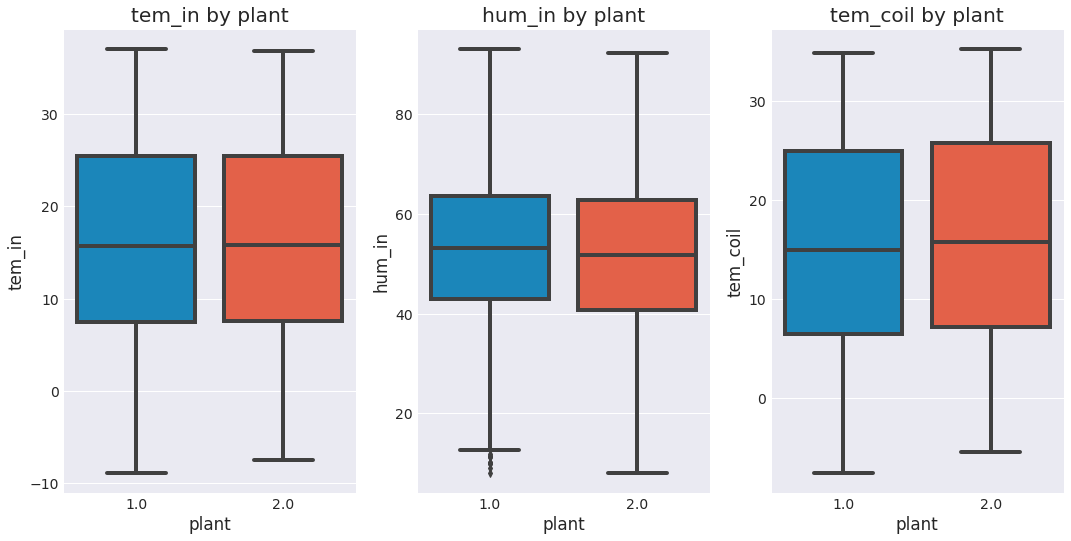

In [ ]:
# 공장들간의 내부 온도, 습도, 코일온도 차이 비교
fig, (axis1, axis2, axis3) = plt.subplots(1, 3,figsize=(16,8))

sns.boxplot(x = 'plant', y = 'tem_in', data=data_plant_total, ax= axis1)
axis1.set_title('tem_in by plant')

sns.boxplot(x = 'plant', y = 'hum_in', data=data_plant_total, ax= axis2)
axis2.set_title('hum_in by plant')

sns.boxplot(x = 'plant', y = 'tem_coil', data=data_plant_total, ax= axis3)
axis3.set_title('tem_coil by plant')

Text(0.5, 1.0, 'hum_out by plant')

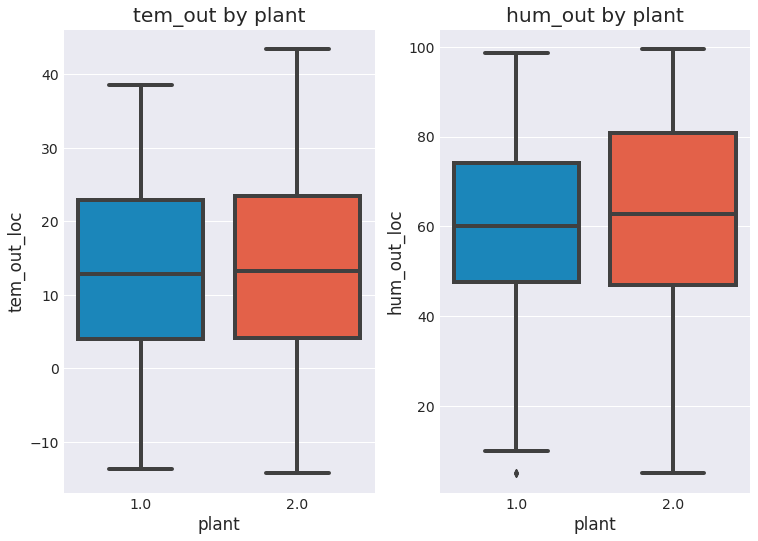

In [ ]:
# 공장들간의 외부 온도, 습도 차이 비교
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(11,8))

sns.boxplot(x = 'plant', y = 'tem_out_loc', data=data_plant_total, ax= axis1)
axis1.set_title('tem_out by plant')

sns.boxplot(x = 'plant', y = 'hum_out_loc', data=data_plant_total, ax= axis2)
axis2.set_title('hum_out by plant')

위 5개의 boxplot 상에서는 내부, 외부 온도, 습도 데이터에 있어서 공장마다 크게 두드러지는 차이를 보이지는 않는다.

In [ ]:
# 일원분산분석으로 유의미한지 판단

model1 = ols('tem_in ~ C(plant)', data_plant_total).fit()
model1 = anova_lm(model1)
print('tem_in ~ plant')
print(f'일원분산분석 결과 : F={round(model1.iloc[0, 3], 2)}, p={round(model1.iloc[0, 4], 6)}')
if round(model1.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model2 = ols('hum_in ~ C(plant)', data_plant_total).fit()
model2 = anova_lm(model2)
print('hum_in ~ plant')
print(f'일원분산분석 결과 : F={round(model2.iloc[0, 3], 2)}, p={round(model2.iloc[0, 4], 6)}')
if round(model2.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model3 = ols('tem_coil ~ C(plant)', data_plant_total).fit()
model3 = anova_lm(model3)
print('tem_coil ~ plant')
print(f'일원분산분석 결과 : F={round(model3.iloc[0, 3], 2)}, p={round(model3.iloc[0, 4], 6)}')
if round(model3.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

  
model4 = ols('tem_out_loc ~ C(plant)', data_plant_total).fit()
model4 = anova_lm(model4)
print('tem_out ~ plant')
print(f'일원분산분석 결과 : F={round(model4.iloc[0, 3], 2)}, p={round(model4.iloc[0, 4], 6)}')
if round(model4.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

  
model5 = ols('hum_out_loc ~ C(plant)', data_plant_total).fit()
model5 = anova_lm(model5)
print('hum_out ~ plant')
print(f'일원분산분석 결과 : F={round(model5.iloc[0, 3], 2)}, p={round(model5.iloc[0, 4], 6)}')
if round(model5.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

tem_in ~ plant
일원분산분석 결과 : F=5.3, p=0.021297
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
hum_in ~ plant
일원분산분석 결과 : F=1120.47, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
tem_coil ~ plant
일원분산분석 결과 : F=563.82, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
tem_out ~ plant
일원분산분석 결과 : F=208.6, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
hum_out ~ plant
일원분산분석 결과 : F=2303.22, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


그래프 상 두드러진 차이를 발견할 수 없기에, 분산분석을 통해 유의미성을 파악해보려고 했다. 

위 분산분석의 결과를 보면, 공장은 각 feature에 대해서 유의미한 차이를 갖는 것을 알 수 있다.

Text(0.5, 1.0, 'tem_coil by loc')

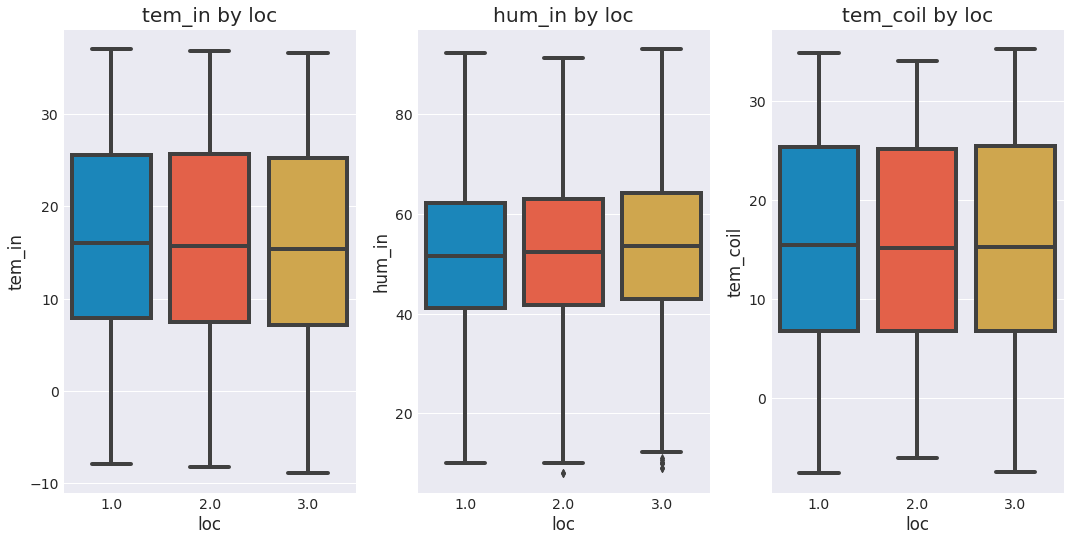

In [ ]:
# loc들간의 내부 온도, 습도, 코일온도 차이 비교
fig, (axis1, axis2, axis3) = plt.subplots(1, 3,figsize=(16,8))

sns.boxplot(x = 'loc', y = 'tem_in', data=data_plant_total, ax= axis1)
axis1.set_title('tem_in by loc')

sns.boxplot(x = 'loc', y = 'hum_in', data=data_plant_total, ax= axis2)
axis2.set_title('hum_in by loc')

sns.boxplot(x = 'loc', y = 'tem_coil', data=data_plant_total, ax= axis3)
axis3.set_title('tem_coil by loc')

boxplot 상에서는 loc마다 내부 데이터에 있어서 미미한 차이를 보인다

In [ ]:
# 일원분산분석으로 유의미한지 판단

model1 = ols('tem_in ~ C(loc)', data_plant_total).fit()
model1 = anova_lm(model1)
print('tem_in ~ loc')
print(f'일원분산분석 결과 : F={round(model1.iloc[0, 3], 2)}, p={round(model1.iloc[0, 4], 6)}')
if round(model1.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model2 = ols('hum_in ~ C(loc)', data_plant_total).fit()
model2 = anova_lm(model2)
print('hum_in ~ loc')
print(f'일원분산분석 결과 : F={round(model2.iloc[0, 3], 2)}, p={round(model2.iloc[0, 4], 6)}')
if round(model2.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model3 = ols('tem_coil ~ C(loc)', data_plant_total).fit()
model3 = anova_lm(model3)
print('tem_coil ~ loc')
print(f'일원분산분석 결과 : F={round(model3.iloc[0, 3], 2)}, p={round(model3.iloc[0, 4], 5)}')
if round(model3.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

tem_in ~ loc
일원분산분석 결과 : F=126.25, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
hum_in ~ loc
일원분산분석 결과 : F=509.68, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
tem_coil ~ loc
일원분산분석 결과 : F=13.04, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


이번에도 마찬가지로 loc마다 미미해보인 차이의 의미를 확인해보려고 분산분석을 진행했고, 위 결과처럼, loc은 각 내부 feature에 대해서 유의미한 차이를 갖는 것을 알 수 있다.

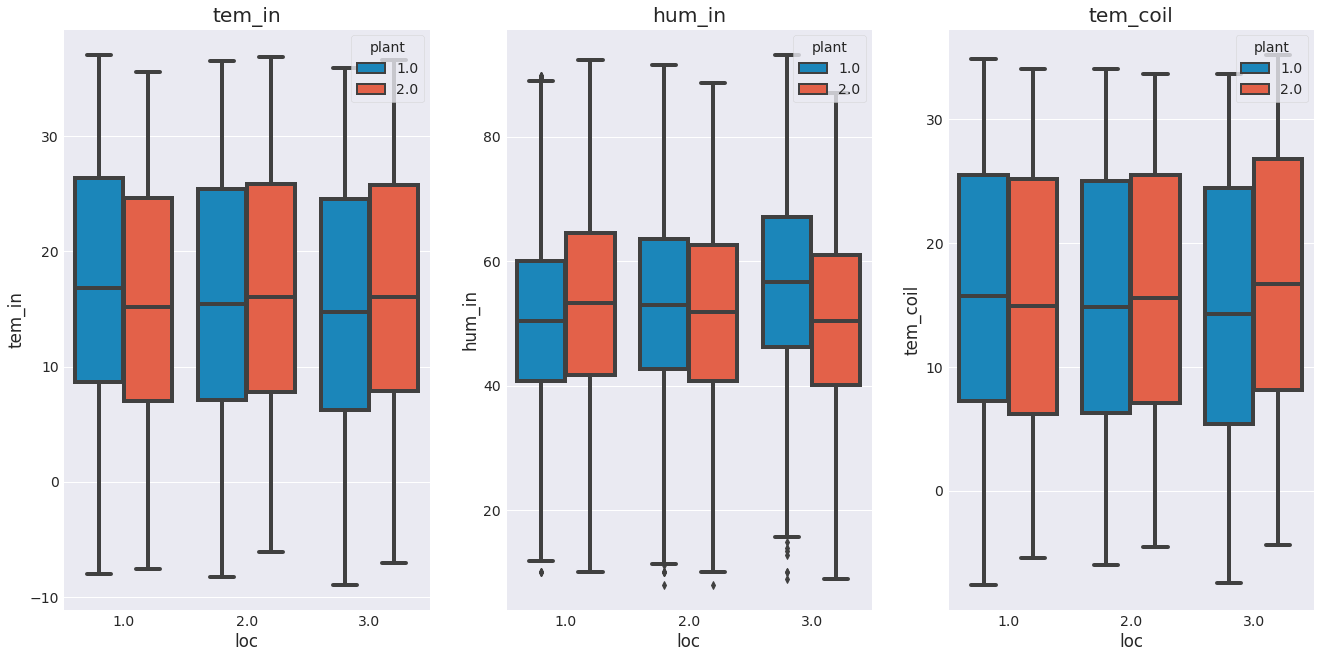

In [ ]:
# loc마다 공장들간의 차이 (boxplot)
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(20,10))

sns.boxplot(x = 'loc', y = 'tem_in', hue = 'plant', data = data_plant_total, ax = axis1)
axis1.set_title('tem_in')
axis1.legend(loc="upper right", title = 'plant')

# sns.violinplot(x = 'loc', y = 'hum_in', hue = 'plant', data = data_plant_total, split = True, ax = axis2)
sns.boxplot(x = 'loc', y = 'hum_in', hue = 'plant', data = data_plant_total, ax = axis2)
axis2.set_title('hum_in')
axis2.legend(loc="upper right", title = 'plant')

sns.boxplot(x = 'loc', y ='tem_coil', hue = 'plant', data = data_plant_total, ax = axis3)
axis3.set_title('tem_coil')
axis3.legend(loc="upper right", title = 'plant')

위 boxplot을 보면, 공장마다 loc들 간의 차이는 존재하는 것처럼 보인다

In [ ]:
# 분산분석으로 유의미한지 판단

model1 = ols('tem_in ~ C(plant) * C(loc)', data_plant_total).fit()
model1 = anova_lm(model1)
# print(model1)
print(' tem_in ~ plant * loc')
for i in range(3):
  print(f'분산분석 결과 {model1.index[i]} : F={round(model1.iloc[i, 3], 2)}, p={round(model1.iloc[i, 4], 6)}')
  if round(model1.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model2 = ols('hum_in ~ C(plant) * C(loc)', data_plant_total).fit()
model2 = anova_lm(model2)
# print(model2)
print('\n','hum_in ~ plant * loc')
for i in range(3):
  print(f'분산분석 결과 {model2.index[i]} : F={round(model2.iloc[i, 3], 2)}, p={round(model2.iloc[i, 4], 6)}')
  if round(model2.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model3 = ols('tem_coil ~ C(plant) * C(loc)', data_plant_total).fit()
model3 = anova_lm(model3)
# print(model3)
print('\n','tem_coil ~ plant * loc')
for i in range(3):
  print(f'분산분석 결과 {model3.index[i]} : F={round(model3.iloc[i, 3], 2)}, p={round(model3.iloc[i, 4], 6)}')
  if round(model3.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

 tem_in ~ plant * loc
분산분석 결과 C(plant) : F=5.33, p=0.021009
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(loc) : F=126.66, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(plant):C(loc) : F=659.8, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.

 hum_in ~ plant * loc
분산분석 결과 C(plant) : F=1142.17, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(loc) : F=517.35, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(plant):C(loc) : F=2878.81, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.

 tem_coil ~ plant * loc
분산분석 결과 C(plant) : F=566.32, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(loc) : F=13.0, p=2e-06
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(plant):C(loc) : F=764.17, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


위 분산분석의 결과를 보면, loc과 plant 그리고 상호작용변수까지 모두 각 내부지표에 대해서 유의미한 차이를 갖는 것을 알 수 있다.

Text(0.5, 1.0, 'tem_coil_avg_slope by plant')

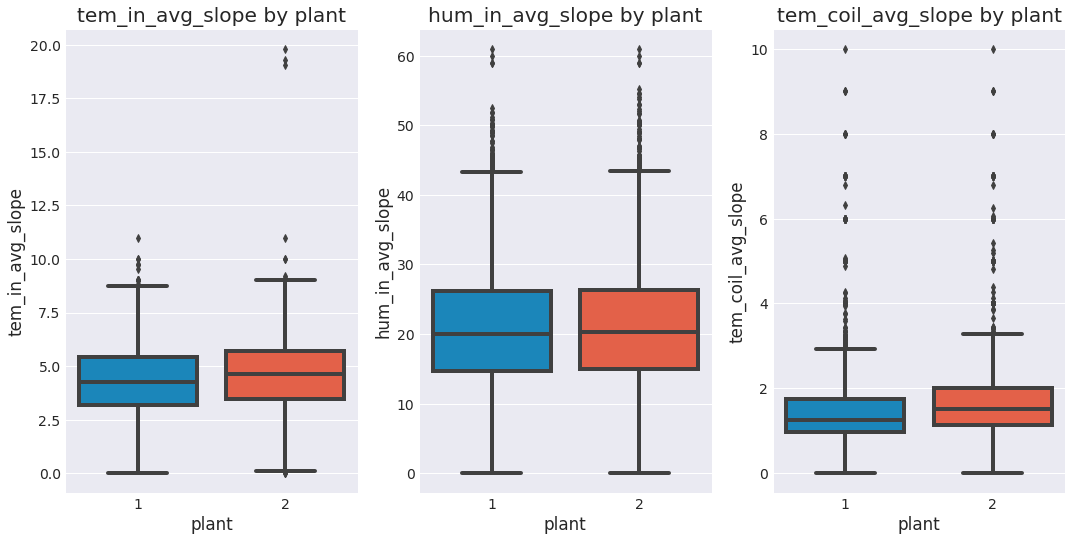

In [ ]:
# 공장들간의 내부 온도, 습도, 코일온도 일교차 비교
fig, (axis1, axis2, axis3) = plt.subplots(1, 3,figsize=(16,8))

sns.boxplot(x = 'plant', y = 'tem_in_avg_slope', data=data_plant_slope_total, ax= axis1)
axis1.set_title('tem_in_avg_slope by plant')

sns.boxplot(x = 'plant', y = 'hum_in_avg_slope', data=data_plant_slope_total, ax= axis2)
axis2.set_title('hum_in_avg_slope by plant')

sns.boxplot(x = 'plant', y = 'tem_coil_avg_slope', data=data_plant_slope_total, ax= axis3)
axis3.set_title('tem_coil_avg_slope by plant')

Text(0.5, 1.0, 'hum_out_avg_slope by plant')

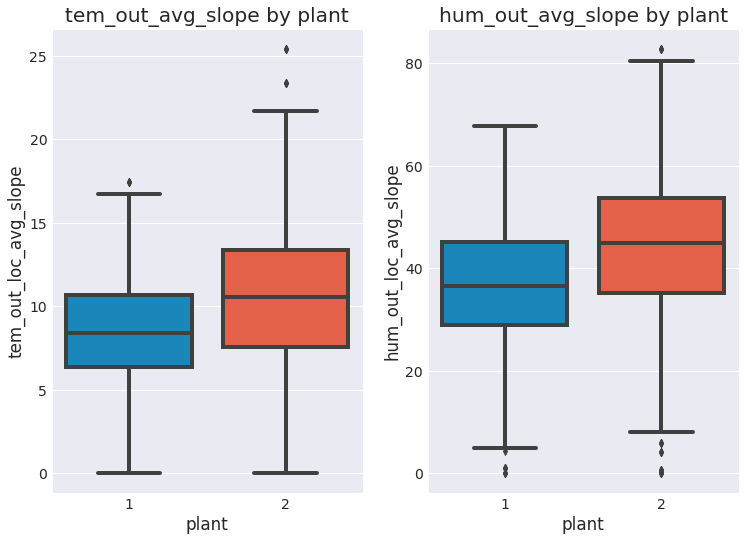

In [ ]:
# 공장들간의 외부 온도, 습도 일교차 비교
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(11,8))

sns.boxplot(x = 'plant', y = 'tem_out_loc_avg_slope', data=data_plant_slope_total, ax= axis1)
axis1.set_title('tem_out_avg_slope by plant')

sns.boxplot(x = 'plant', y = 'hum_out_loc_avg_slope', data=data_plant_slope_total, ax= axis2)
axis2.set_title('hum_out_avg_slope by plant')

위 5개의 boxplot 상에서는 내부 feature간에는 크게 두드러지는 차이를 보이지 않지만, 외부 온도, 습도 데이터에 있어서는 2공장이 1공장보다 큰 일교차를 갖는 것을 볼 수 있다.

1공장이 2공장보다 내륙이 있는 것이 영향을 줄 수도 있다고 판단된다.

In [ ]:
# 분산분석으로 유의미한지 판단

model1 = ols('tem_in_avg_slope ~ C(plant)', data_plant_slope_total).fit()
model1 = anova_lm(model1)
print('tem_in_avg_slope ~ plant')
print(f'분산분석 결과 : F={round(model1.iloc[0, 3], 2)}, p={round(model1.iloc[0, 4], 6)}')
if round(model1.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model2 = ols('hum_in_avg_slope ~ C(plant)', data_plant_slope_total).fit()
model2 = anova_lm(model2)
print('hum_in_avg_slope ~ plant')
print(f'분산분석 결과 : F={round(model2.iloc[0, 3], 2)}, p={round(model2.iloc[0, 4], 6)}')
if round(model2.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model3 = ols('tem_coil_avg_slope ~ C(plant)', data_plant_slope_total).fit()
model3 = anova_lm(model3)
print('tem_coil_avg_slope ~ plant')
print(f'분산분석 결과 : F={round(model3.iloc[0, 3], 2)}, p={round(model3.iloc[0, 4], 6)}')
if round(model3.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

  
model4 = ols('tem_out_loc_avg_slope ~ C(plant)', data_plant_slope_total).fit()
model4 = anova_lm(model4)
print('tem_out_avg_slope ~ plant')
print(f'분산분석 결과 : F={round(model4.iloc[0, 3], 2)}, p={round(model4.iloc[0, 4], 6)}')
if round(model4.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

  
model5 = ols('hum_out_loc_avg_slope ~ C(plant)', data_plant_slope_total).fit()
model5 = anova_lm(model5)
print('hum_out_avg_slope ~ plant')
print(f'분산분석 결과 : F={round(model5.iloc[0, 3], 2)}, p={round(model5.iloc[0, 4], 6)}')
if round(model5.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

tem_in_avg_slope ~ plant
분산분석 결과 : F=46.82, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
hum_in_avg_slope ~ plant
분산분석 결과 : F=2.3, p=0.12952
P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.
tem_coil_avg_slope ~ plant
분산분석 결과 : F=75.05, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
tem_out_avg_slope ~ plant
분산분석 결과 : F=533.18, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
hum_out_avg_slope ~ plant
분산분석 결과 : F=542.69, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


일교차도 마찬가지로 확실한 유의미성을 보기 위해 분산분석을 진행했다.

위 분산분석의 결과를 보면, 공장은 습도의 일교차를 제외한 나머지 변수에 대해서 유의미한 차이를 갖는 것을 알 수 있다.

내부 습도의 일교차는 공장의 영향을 받지 않는다.

Text(0.5, 1.0, 'tem_coil_avg_slope by loc')

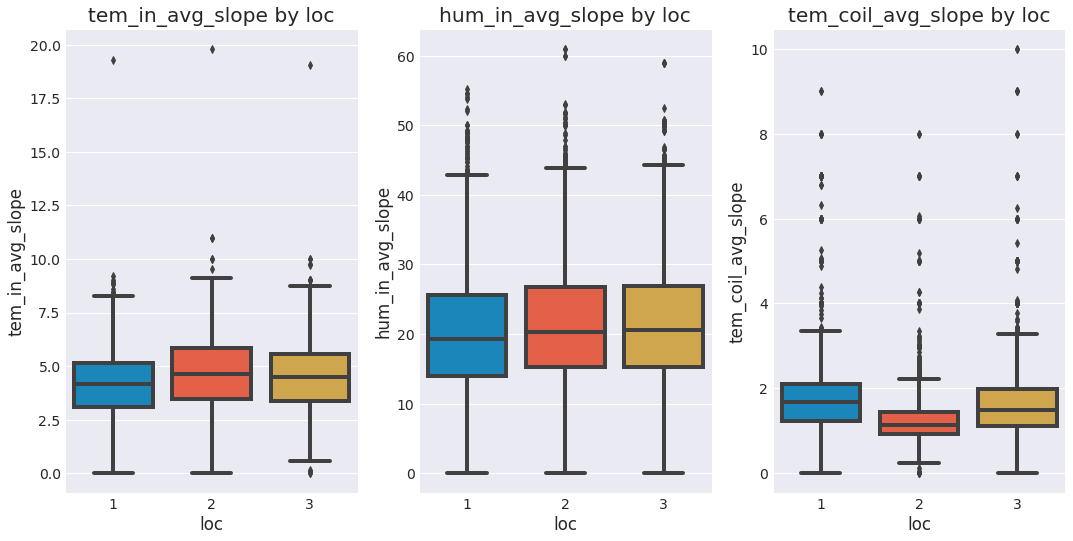

In [ ]:
# loc들간의 내부 온도, 습도, 코일온도 일교차 비교
fig, (axis1, axis2, axis3) = plt.subplots(1, 3,figsize=(16,8))

sns.boxplot(x = 'loc', y = 'tem_in_avg_slope', data=data_plant_slope_total, ax= axis1)
axis1.set_title('tem_in_avg_slope by loc')

sns.boxplot(x = 'loc', y = 'hum_in_avg_slope', data=data_plant_slope_total, ax= axis2)
axis2.set_title('hum_in_avg_slope by loc')

sns.boxplot(x = 'loc', y = 'tem_coil_avg_slope', data=data_plant_slope_total, ax= axis3)
axis3.set_title('tem_coil_avg_slope by loc')

boxplot 상에서는 loc마다 내부 데이터에 있어서 미미한 차이를 보인다

In [ ]:
# 분산분석으로 유의미한지 판단

model1 = ols('tem_in_avg_slope ~ C(loc)', data_plant_slope_total).fit()
model1 = anova_lm(model1)
print('tem_in_avg_slope ~ loc')
print(f'분산분석 결과 : F={round(model1.iloc[0, 3], 2)}, p={round(model1.iloc[0, 4], 6)}')
if round(model1.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model2 = ols('hum_in_avg_slope ~ C(loc)', data_plant_slope_total).fit()
model2 = anova_lm(model2)
print('hum_in_avg_slope ~ loc')
print(f'분산분석 결과 : F={round(model2.iloc[0, 3], 2)}, p={round(model2.iloc[0, 4], 6)}')
if round(model2.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model3 = ols('tem_coil_avg_slope ~ C(loc)', data_plant_slope_total).fit()
model3 = anova_lm(model3)
print('tem_coil_avg_slope ~ loc')
print(f'분산분석 결과 : F={round(model3.iloc[0, 3], 2)}, p={round(model3.iloc[0, 4], 6)}')
if round(model3.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

tem_in_avg_slope ~ loc
분산분석 결과 : F=43.64, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
hum_in_avg_slope ~ loc
분산분석 결과 : F=11.58, p=1e-05
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
tem_coil_avg_slope ~ loc
분산분석 결과 : F=206.55, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


이번에도 마찬가지로 loc마다 미미해보인 차이의 의미를 확인해보려고 분산분석을 진행했고, 위 결과처럼, loc은 각 내부지표에 대해서 유의미한 차이를 갖는 것을 알 수 있다.

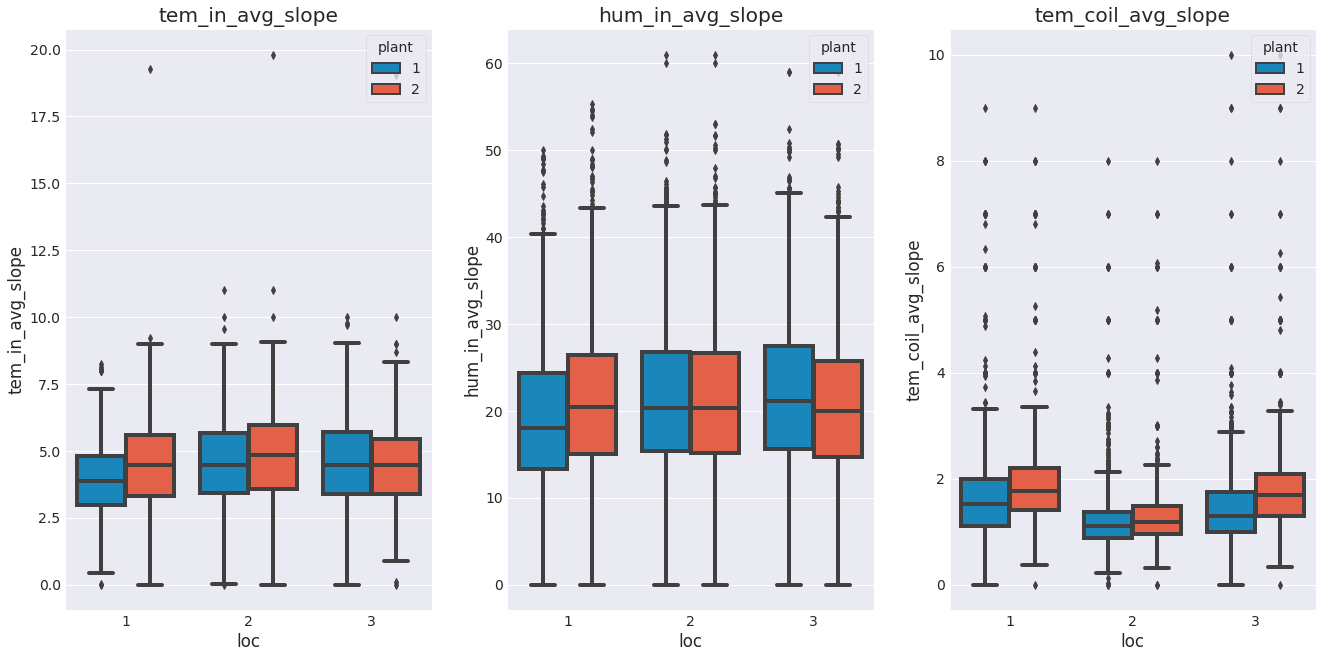

In [ ]:
# loc마다 공장들간의 일교차 비교
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(20,10))

sns.boxplot(x = 'loc', y = 'tem_in_avg_slope', hue = 'plant', data = data_plant_slope_total, ax = axis1)
axis1.set_title('tem_in_avg_slope')
axis1.legend(loc="upper right", title = 'plant')

# sns.violinplot(x = 'loc', y = 'hum_in_avg_slope', hue = 'plant', data = data_plant_slope_total, split = True, ax = axis2)
sns.boxplot(x = 'loc', y = 'hum_in_avg_slope', hue = 'plant', data = data_plant_slope_total, ax = axis2)
axis2.set_title('hum_in_avg_slope')
axis2.legend(loc="upper right", title = 'plant')

sns.boxplot(x = 'loc', y ='tem_coil_avg_slope', hue = 'plant', data = data_plant_slope_total, ax = axis3)
axis3.set_title('tem_coil_avg_slope')
axis3.legend(loc="upper right", title = 'plant')

위 boxplot을 보면, 공장마다 loc들 간의 차이는 미미하게 존재하는 것처럼 보인다

In [ ]:
# 분산분석으로 유의미한지 판단

model1 = ols('tem_in_avg_slope ~ C(plant) * C(loc)', data_plant_slope_total).fit()
model1 = anova_lm(model1)
# print(model1)
print(' tem_in_avg_slope ~ plant * loc')
for i in range(3):
  print(f'분산분석 결과 {model1.index[i]} : F={round(model1.iloc[i, 3], 2)}, p={round(model1.iloc[i, 4], 6)}')
  if round(model1.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model2 = ols('hum_in_avg_slope ~ C(plant) * C(loc)', data_plant_slope_total).fit()
model2 = anova_lm(model2)
# print(model2)
print('\n','hum_in_avg_slope ~ plant * loc')
for i in range(3):
  print(f'분산분석 결과 {model2.index[i]} : F={round(model2.iloc[i, 3], 2)}, p={round(model2.iloc[i, 4], 6)}')
  if round(model2.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model3 = ols('tem_coil_avg_slope ~ C(plant) * C(loc)', data_plant_slope_total).fit()
model3 = anova_lm(model3)
# print(model3)
print('\n','tem_coil_avg_slope ~ plant * loc')
for i in range(3):
  print(f'분산분석 결과 {model3.index[i]} : F={round(model3.iloc[i, 3], 2)}, p={round(model3.iloc[i, 4], 6)}')
  if round(model3.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

 tem_in_avg_slope ~ plant * loc
분산분석 결과 C(plant) : F=47.84, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(loc) : F=44.78, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(plant):C(loc) : F=27.7, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.

 hum_in_avg_slope ~ plant * loc
분산분석 결과 C(plant) : F=2.32, p=0.127846
P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.
분산분석 결과 C(loc) : F=11.7, p=8e-06
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(plant):C(loc) : F=18.67, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.

 tem_coil_avg_slope ~ plant * loc
분산분석 결과 C(plant) : F=80.14, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(loc) : F=208.78, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(plant):C(loc) : F=12.19, p=5e-06
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


분산분석의 결과를 보면, 앞서 습도의 일교차가 plant의 영향을 받지 않았던 것과 같은 결과를 제외하고 다른 feature들에 대해서는 loc과 plant 그리고 상호작용변수까지 모두 각 내부지표에 대해서 유의미한 차이를 갖는 것을 알 수 있다.

내부 습도의 일교차는 앞서 봤던 것처럼 공장의 영향을 받지 않는다. 다만, loc의 영향은 받는다고 볼 수 있다.

### 결론

현대제철에서 제공받은 내부 온도, 습도, 코일온도와 외부 온도, 습도의 데이터들이 모두 공장, loc에 따라 평균에 있어서는 미미한 차이를 갖지만 충분히 유의미한 차이를 갖는다는 것을 분산분석에서 파악할 수 있었다. 

또한, 일교차에 관한 feature에 대해서도 내부 습도의 일교차가 공장마다 영향을 받지 않는 것을 제외하고는 모두 공장, loc마다 유의미한 차이를 갖는다는 것을 볼 수 있었다.


## 결로 여부에 따른 시각화

Text(0.5, 1.0, 'tem_coil by cond_loc')

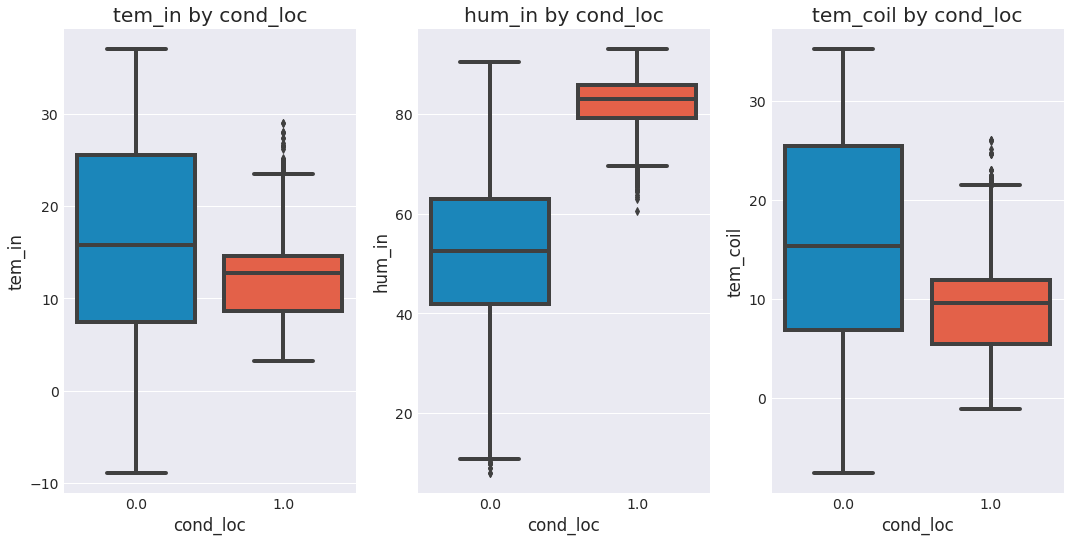

In [ ]:
# 결로 여부에 따른 내부 온도, 습도, 코일온도 차이 비교
fig, (axis1, axis2, axis3) = plt.subplots(1, 3,figsize=(16,8))

sns.boxplot(x = 'cond_loc', y = 'tem_in', data=data_plant_total, ax= axis1)
axis1.set_title('tem_in by cond_loc')

sns.boxplot(x = 'cond_loc', y = 'hum_in', data=data_plant_total, ax= axis2)
axis2.set_title('hum_in by cond_loc')

sns.boxplot(x = 'cond_loc', y = 'tem_coil', data=data_plant_total, ax= axis3)
axis3.set_title('tem_coil by cond_loc')

Text(0.5, 1.0, 'hum_out by cond_loc')

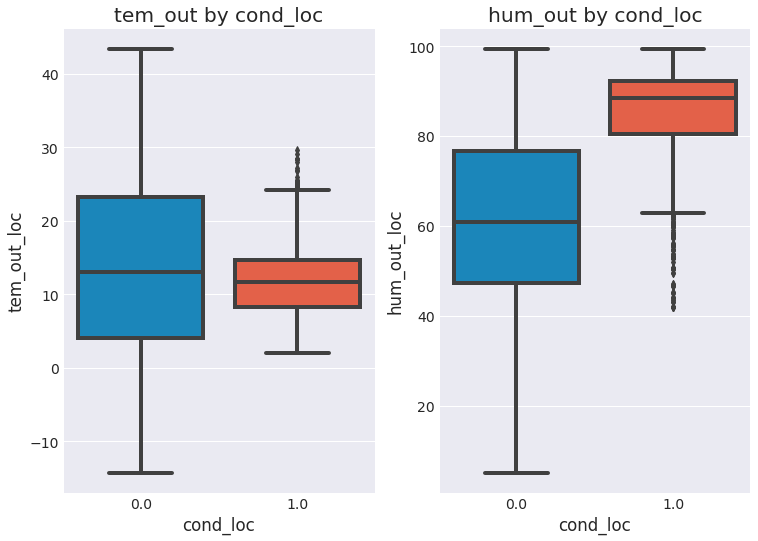

In [ ]:
# 결로여부에 따른 외부 온도, 습도 차이 비교
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(11,8))

sns.boxplot(x = 'cond_loc', y = 'tem_out_loc', data=data_plant_total, ax= axis1)
axis1.set_title('tem_out by cond_loc')

sns.boxplot(x = 'cond_loc', y = 'hum_out_loc', data=data_plant_total, ax= axis2)
axis2.set_title('hum_out by cond_loc')


위 5개의 boxplot 상에서는 온도 feature에 대해서는 결로일 때 평상시보다 조금 낮은 값을 갖는 것으로 보이며, 습도 feature에 대해서는 확연한 차이를 보인다.

In [ ]:
# 일원분산분석으로 유의미한지 판단

model1 = ols('tem_in ~ C(cond_loc)', data_plant_total).fit()
model1 = anova_lm(model1)
print('tem_in ~ cond_loc')
print(f'일원분산분석 결과 : F={round(model1.iloc[0, 3], 2)}, p={round(model1.iloc[0, 4], 6)}')
if round(model1.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model2 = ols('hum_in ~ C(cond_loc)', data_plant_total).fit()
model2 = anova_lm(model2)
print('hum_in ~ cond_loc')
print(f'일원분산분석 결과 : F={round(model2.iloc[0, 3], 2)}, p={round(model2.iloc[0, 4], 6)}')
if round(model2.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model3 = ols('tem_coil ~ C(cond_loc)', data_plant_total).fit()
model3 = anova_lm(model3)
print('tem_coil ~ cond_loc')
print(f'일원분산분석 결과 : F={round(model3.iloc[0, 3], 2)}, p={round(model3.iloc[0, 4], 6)}')
if round(model3.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

  
model4 = ols('tem_out_loc ~ C(cond_loc)', data_plant_total).fit()
model4 = anova_lm(model4)
print('tem_out ~ cond_loc')
print(f'일원분산분석 결과 : F={round(model4.iloc[0, 3], 2)}, p={round(model4.iloc[0, 4], 6)}')
if round(model4.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

  
model5 = ols('hum_out_loc ~ C(cond_loc)', data_plant_total).fit()
model5 = anova_lm(model5)
print('hum_out ~ cond_loc')
print(f'일원분산분석 결과 : F={round(model5.iloc[0, 3], 2)}, p={round(model5.iloc[0, 4], 6)}')
if round(model5.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')



tem_in ~ cond_loc
일원분산분석 결과 : F=239.17, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
hum_in ~ cond_loc
일원분산분석 결과 : F=9407.12, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
tem_coil ~ cond_loc
일원분산분석 결과 : F=739.75, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
tem_out ~ cond_loc
일원분산분석 결과 : F=27.35, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
hum_out ~ cond_loc
일원분산분석 결과 : F=3315.27, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


분산분석의 결과를 보면, 모든 feature가 결로여부에 따라 유의미한 차이를 갖는 것을 알 수 있다.

Text(0.5, 1.0, 'tem_coil_avg_slope by cond_loc')

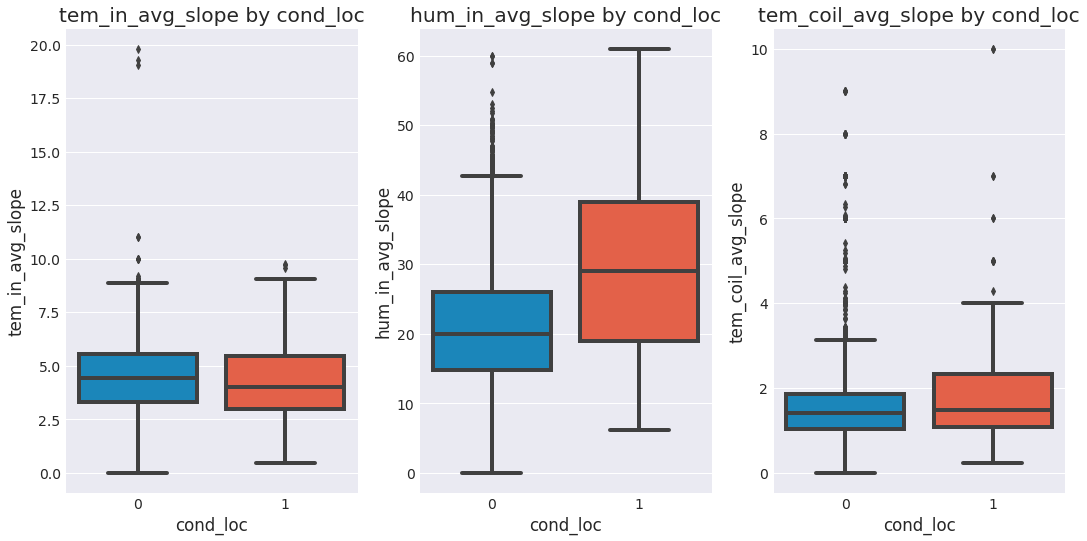

In [ ]:
# 결로 여부에 따른 내부 온도, 습도, 코일온도 일교차 차이 비교
fig, (axis1, axis2, axis3) = plt.subplots(1, 3,figsize=(16,8))

sns.boxplot(x = 'cond_loc', y = 'tem_in_avg_slope', data=data_plant_slope_total, ax= axis1)
axis1.set_title('tem_in_avg_slope by cond_loc')

sns.boxplot(x = 'cond_loc', y = 'hum_in_avg_slope', data=data_plant_slope_total, ax= axis2)
axis2.set_title('hum_in_avg_slope by cond_loc')

sns.boxplot(x = 'cond_loc', y = 'tem_coil_avg_slope', data=data_plant_slope_total, ax= axis3)
axis3.set_title('tem_coil_avg_slope by cond_loc')

Text(0.5, 1.0, 'hum_out_avg_slope by cond_loc')

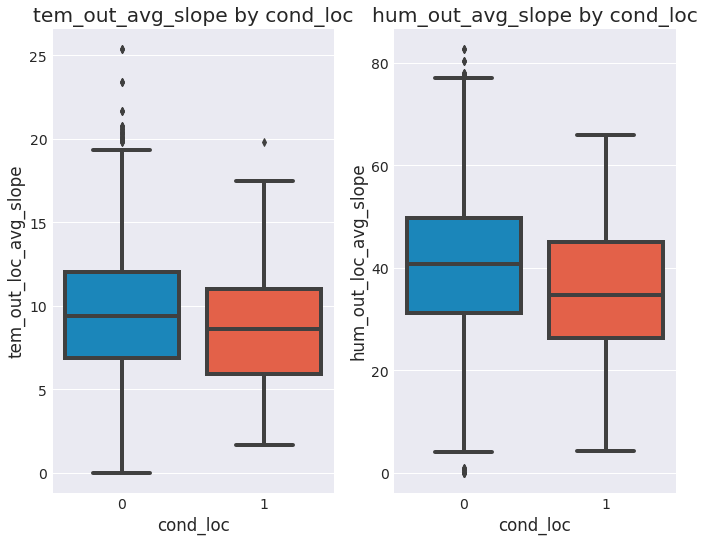

In [ ]:
# 결로 여부에 따른 외부 온도, 습도 일교차 차이 비교
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(10,8))

sns.boxplot(x = 'cond_loc', y = 'tem_out_loc_avg_slope', data=data_plant_slope_total, ax= axis1)
axis1.set_title('tem_out_avg_slope by cond_loc')

sns.boxplot(x = 'cond_loc', y = 'hum_out_loc_avg_slope', data=data_plant_slope_total, ax= axis2)
axis2.set_title('hum_out_avg_slope by cond_loc')


위 5개의 boxplot을 보면 결로 여부에 따라 모든 변수에 대해 차이를 보인다. 특히, 내외부 습도 feature들의 경우, 결로 발생 여부 차이 따라 큰 폭의 평균을 보인다.

특히, 공장 내부 습도는 결로 발생시 평상시보다 습도가 상대적으로 높은데, 공장 외부 습도는 오히려 상대적으로 낮다는 점이 눈에 띈다. 수치적으로 비교해보면, 결로가 발생했을 때 내외부 습도의 평균은 큰 차이가 없으나, 평상시에는 내부 습도가 외부의 절반 밖에 되지 않는다. 이는 습도가 같는 영향력이 큰다는 것을 간접적으로 시사한다고 볼 수 있다.

In [ ]:
# 일원분산분석으로 유의미한지 판단

model1 = ols('tem_in_avg_slope ~ C(cond_loc)', data_plant_slope_total).fit()
model1 = anova_lm(model1)
print('tem_in_avg_slope ~ cond_loc')
print(f'일원분산분석 결과 : F={round(model1.iloc[0, 3], 2)}, p={round(model1.iloc[0, 4], 6)}')
if round(model1.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model2 = ols('hum_in_avg_slope ~ C(cond_loc)', data_plant_slope_total).fit()
model2 = anova_lm(model2)
print('hum_in_avg_slope ~ cond_loc')
print(f'일원분산분석 결과 : F={round(model2.iloc[0, 3], 2)}, p={round(model2.iloc[0, 4], 6)}')
if round(model2.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model3 = ols('tem_coil_avg_slope ~ C(cond_loc)', data_plant_slope_total).fit()
model3 = anova_lm(model3)
print('tem_coil_avg_slope ~ cond_loc')
print(f'일원분산분석 결과 : F={round(model3.iloc[0, 3], 2)}, p={round(model3.iloc[0, 4], 6)}')
if round(model3.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

  
model4 = ols('tem_out_loc_avg_slope ~ C(cond_loc)', data_plant_slope_total).fit()
model4 = anova_lm(model4)
print('tem_out_avg_slope ~ cond_loc')
print(f'일원분산분석 결과 : F={round(model4.iloc[0, 3], 2)}, p={round(model4.iloc[0, 4], 6)}')
if round(model4.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

  
model5 = ols('hum_out_loc_avg_slope ~ C(cond_loc)', data_plant_slope_total).fit()
model5 = anova_lm(model5)
print('hum_out_avg_slope ~ cond_loc')
print(f'일원분산분석 결과 : F={round(model5.iloc[0, 3], 2)}, p={round(model5.iloc[0, 4], 6)}')
if round(model5.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

tem_in_avg_slope ~ cond_loc
일원분산분석 결과 : F=1.68, p=0.194352
P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.
hum_in_avg_slope ~ cond_loc
일원분산분석 결과 : F=176.71, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
tem_coil_avg_slope ~ cond_loc
일원분산분석 결과 : F=34.04, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
tem_out_avg_slope ~ cond_loc
일원분산분석 결과 : F=15.54, p=8.2e-05
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
hum_out_avg_slope ~ cond_loc
일원분산분석 결과 : F=26.94, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


분산분석 결과, 내부 온도 일교차를 제외한 나머지 feature들에 대해서는 유의미한 차이를 보인다.

내부 온도 일교차는 결로여부의 영향을 받지 않는다.

### 내부 온도와 코일 온도간의 차이에 따른 시각화

Text(0.5, 1.0, 'tem_in_coil_diff by cond_loc')

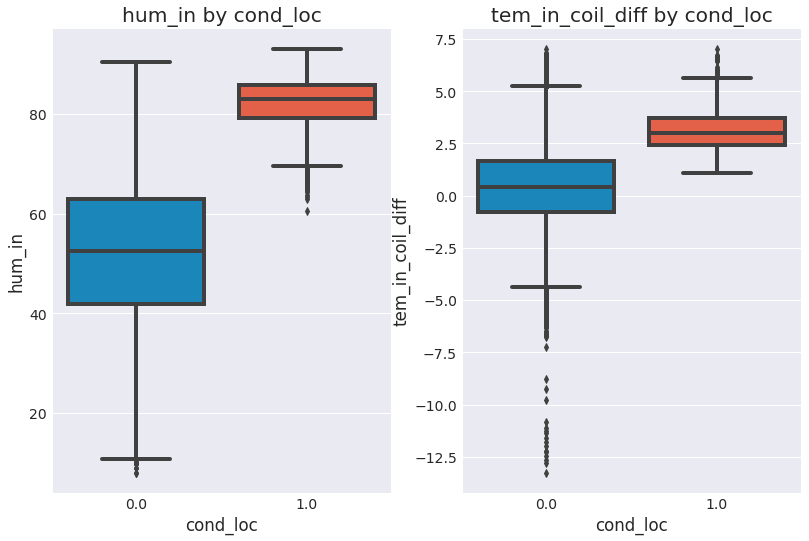

In [ ]:
# 결로 여부에 따른 내부 습도와 (내부 온도 - 코일온도) 차이 비교
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(12,8))

sns.boxplot(x='cond_loc', y='hum_in', data=data_plant_total, ax= axis1)
axis1.set_title('hum_in by cond_loc')

sns.boxplot(x='cond_loc', y='tem_in_coil_diff', data=data_plant_total, ax= axis2)
axis2.set_title('tem_in_coil_diff by cond_loc')

In [ ]:
# 분산분석 결과

model1 = ols('tem_in_coil_diff ~ C(cond_loc)', data_plant_total).fit()
model1 = anova_lm(model1)
print('tem_in_coil_diff ~ cond_loc')
print(f'분산분석 결과 : F={round(model1.iloc[0, 3], 2)}, p={round(model1.iloc[0, 4], 6)}')
if round(model1.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


tem_in_coil_diff ~ cond_loc
분산분석 결과 : F=5130.22, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


분산분석 결과, 내부온도와 코일온도간의 차이는 결로 여부에 따라 유의미하다.

더 나아가, 이 차이값과 습도, 결로여부간의 연관성을 보고 싶었다.

In [ ]:
# 결로일 때 내부온도와 코일온도차의 범주 안에 있는 데이터들을 분리해서 하나의 셋을 생성
min_diff = min(data_plant_total[data_plant_total["cond_loc"] == 1].tem_in_coil_diff)
max_diff = max(data_plant_total[data_plant_total["cond_loc"] == 1].tem_in_coil_diff)

temp_diff = data_plant_total[data_plant_total["tem_in_coil_diff"] >= min_diff]
temp_diff = temp_diff[temp_diff["tem_in_coil_diff"] <= max_diff]
temp_diff

,mea_ddhr,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc,hum_out_loc,cond_loc,date,time,year,month,day,tem_in_coil_diff
0,2016-04-01 00:00:00,1.0,1.0,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-01,0.0,2016,4,1,5.00
1,2016-04-01 00:00:00,1.0,2.0,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-01,0.0,2016,4,1,3.00
2,2016-04-01 00:00:00,1.0,3.0,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-01,0.0,2016,4,1,3.00
3,2016-04-01 03:00:00,1.0,1.0,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-01,180.0,2016,4,1,4.00
4,2016-04-01 03:00:00,1.0,2.0,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-01,180.0,2016,4,1,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350270,2019-03-31 18:30:00,2.0,1.0,11.04,28.27,9.53,5.97,39.16,0.0,2019-03-31,1110.0,2019,3,31,1.51
350273,2019-03-31 18:40:00,2.0,1.0,10.82,27.72,9.53,5.70,41.79,0.0,2019-03-31,1120.0,2019,3,31,1.29
350276,2019-03-31 18:50:00,2.0,1.0,10.61,28.42,9.45,5.51,44.87,0.0,2019-03-31,1130.0,2019,3,31,1.16
350279,2019-03-31 19:00:00,2.0,1.0,10.61,30.34,9.41,5.36,45.24,0.0,2019-03-31,1140.0,2019,3,31,1.20


Text(0.5, 1.0, 'hum_in by cond_loc')

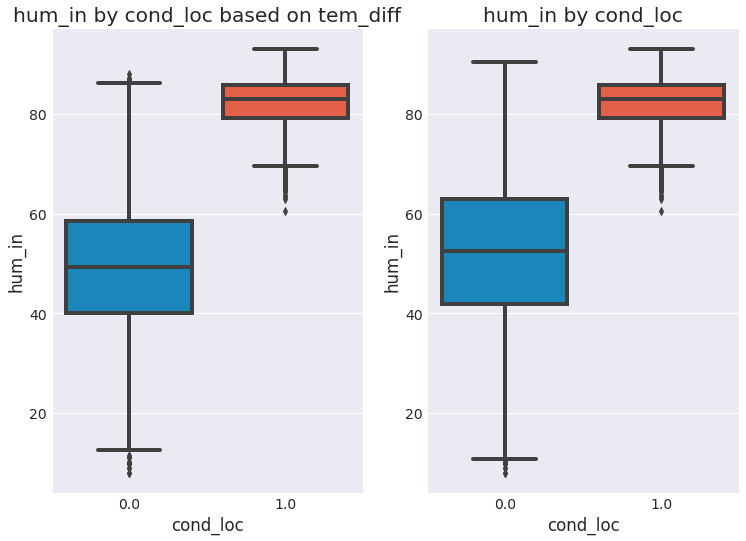

In [ ]:
# 결로 여부에 따른 내부 온도, 습도, 코일온도 일교차 차이 비교
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(11,8))

sns.boxplot(x='cond_loc', y='hum_in', data=temp_diff, ax= axis1)
axis1.set_title('hum_in by cond_loc based on tem_diff')

sns.boxplot(x='cond_loc', y='hum_in', data=data_plant_total, ax= axis2)
axis2.set_title('hum_in by cond_loc')

위 boxplot을 보면, 왼쪽은 결로가 발생했을 때 내부온도와 코일온도의 온도차 안에 있는 데이터셋을 바탕으로 한 것이고, 오른쪽은 원래의 train 데이터셋으로 그린 그래프다.

왼쪽 boxplot이 결로 발생하지 않았을 때 습도평균이 좀 더 낮은 것을 볼 수 있다.

In [ ]:
# 분산분석 결과

model1 = ols('hum_in ~ C(cond_loc)', temp_diff).fit()
model1 = anova_lm(model1)
print('hum_in ~ cond_loc')
print(f'분산분석 결과 : F={round(model1.iloc[0, 3], 2)}, p={round(model1.iloc[0, 4], 6)}')
if round(model1.iloc[0, 4], 6) < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
else:
  print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

hum_in ~ cond_loc
분산분석 결과 : F=12505.1, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


분산분석 결과, 결로가 발생했을 때 내부 온도와 코일 온도의 차이값과 습도간의 충분한 연관성이 있다고 볼 수 있으며, 이를 모델에 반영해도 좋을 것 같다.

### 결로 여부에 따른 공장 & loc 시각화

Text(0.5, 1.0, 'tem_coil by plant based on cond_loc')

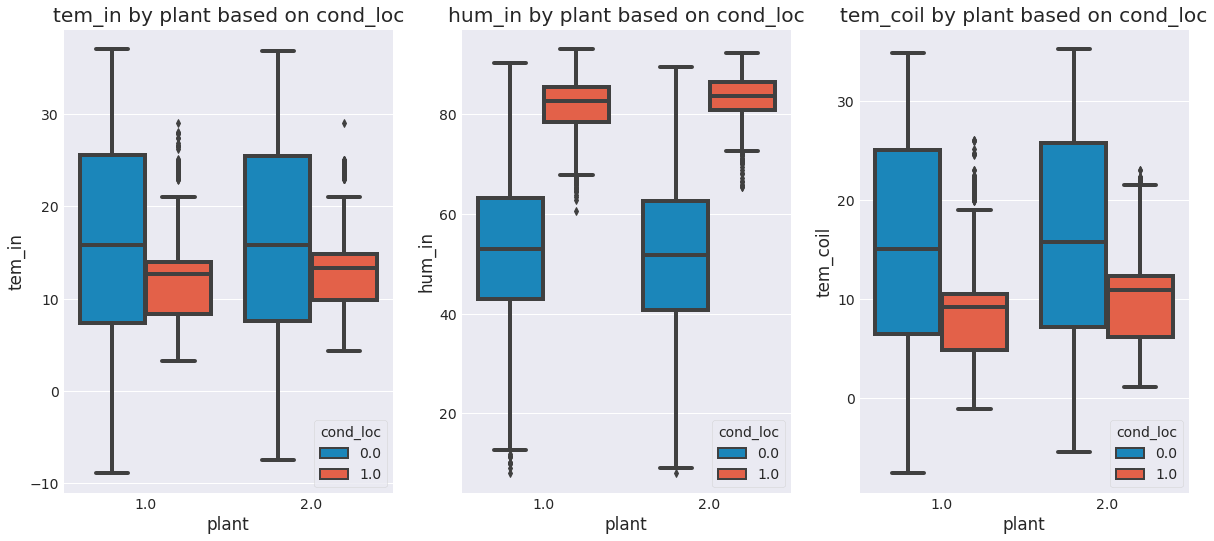

In [ ]:
# 각 공장별 결로여부에 따른 차이 (내부 feature)
fig, (axis1, axis2, axis3) = plt.subplots(1, 3,figsize=(18,8))

a1 = sns.boxplot(x = 'plant', y = 'tem_in', hue = 'cond_loc', data = data_plant_total, ax = axis1)
a1.legend(loc="lower right", title = 'cond_loc')
a1.set_title('tem_in by plant based on cond_loc')

a2 = sns.boxplot(x = 'plant', y = 'hum_in', hue = 'cond_loc', data = data_plant_total, ax = axis2)
a2.legend(loc="lower right", title = 'cond_loc')
a2.set_title('hum_in by plant based on cond_loc')

a3 = sns.boxplot(x = 'plant', y ='tem_coil', hue = 'cond_loc', data = data_plant_total, ax = axis3)
a3.legend(loc="lower right", title = 'cond_loc')
a3.set_title('tem_coil by plant based on cond_loc')


Text(0.5, 1.0, 'hum_out by plant based on cond_loc')

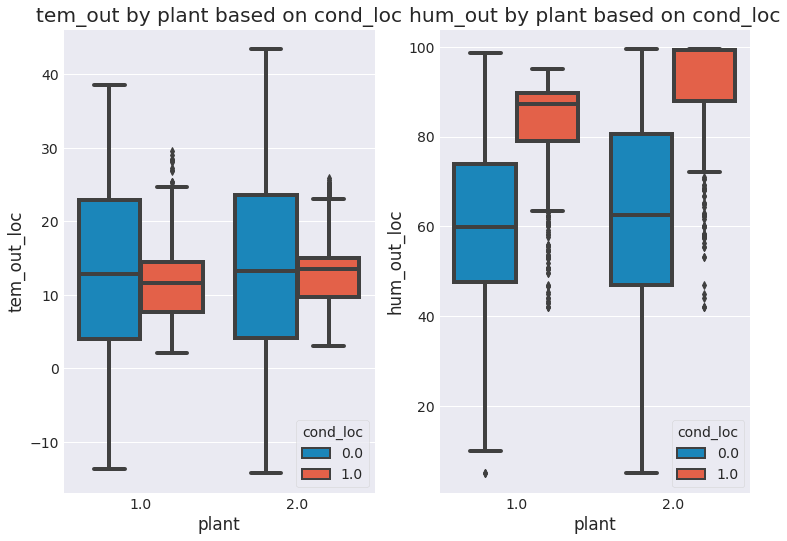

In [ ]:
# 각 공장별 결로여부에 따른 차이 (외부 feature)
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(11,8))

a1 = sns.boxplot(x = 'plant', y = 'tem_out_loc', hue = 'cond_loc', data = data_plant_total, ax = axis1)
a1.legend(loc="lower right", title = 'cond_loc')
a1.set_title('tem_out by plant based on cond_loc')

a2 = sns.boxplot(x = 'plant', y = 'hum_out_loc', hue = 'cond_loc', data = data_plant_total, ax = axis2)
a2.legend(loc="lower right", title = 'cond_loc')
a2.set_title('hum_out by plant based on cond_loc')


위 boxplot을 보면 두 공장모두 결로 발생 시, 온도, 습도, 코일 온도 모두 결로가 발생하지 않았을때보다 확실히 다른 차이를 보이는 것을 알 수 있다.
외부 feature에 있어서는 습도간의 차이가 눈에 띈다.

In [ ]:
# 분산분석으로 유의미한지 판단

model1 = ols('tem_in ~ C(cond_loc) * C(plant)', data_plant_total).fit()
model1 = anova_lm(model1)
# print(model1)
print(' tem_in ~ cond_loc * plant')
for i in range(3):
  print(f'분산분석 결과 {model1.index[i]} : F={round(model1.iloc[i, 3], 2)}, p={round(model1.iloc[i, 4], 6)}')
  if round(model1.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model2 = ols('hum_in ~ C(cond_loc) * C(plant)', data_plant_total).fit()
model2 = anova_lm(model2)
# print(model2)
print('\n', 'hum_in ~ cond_loc * plant')
for i in range(3):
  print(f'분산분석 결과 {model2.index[i]} : F={round(model2.iloc[i, 3], 2)}, p={round(model2.iloc[i, 4], 6)}')
  if round(model2.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model3 = ols('tem_coil ~ C(cond_loc) * C(plant)', data_plant_total).fit()
model3 = anova_lm(model3)
# print(model3)
print('\n','tem_coil ~ cond_loc * plant')
for i in range(3):
  print(f'분산분석 결과 {model3.index[i]} : F={round(model3.iloc[i, 3], 2)}, p={round(model3.iloc[i, 4], 6)}')
  if round(model3.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model4 = ols('tem_out_loc ~ C(cond_loc) * C(plant)', data_plant_total).fit()
model4 = anova_lm(model4)
# print(model4)
print('\n','tem_out ~ cond_loc * plant')
for i in range(3):
  print(f'분산분석 결과 {model4.index[i]} : F={round(model4.iloc[i, 3], 2)}, p={round(model4.iloc[i, 4], 6)}')
  if round(model4.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model5 = ols('hum_out_loc ~ C(cond_loc) * C(plant)', data_plant_total).fit()
model5 = anova_lm(model5)
# print(model5)
print('\n','hum_out ~ cond_loc * plant')
for i in range(3):
  print(f'분산분석 결과 {model5.index[i]} : F={round(model5.iloc[i, 3], 2)}, p={round(model5.iloc[i, 4], 6)}')
  if round(model5.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

 tem_in ~ cond_loc * plant
분산분석 결과 C(cond_loc) : F=239.17, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(plant) : F=3.35, p=0.067185
P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.
분산분석 결과 C(cond_loc):C(plant) : F=1.59, p=0.207309
P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.

 hum_in ~ cond_loc * plant
분산분석 결과 C(cond_loc) : F=9433.14, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(plant) : F=957.96, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(plant) : F=13.15, p=0.000287
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.

 tem_coil ~ cond_loc * plant
분산분석 결과 C(cond_loc) : F=740.86, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(plant) : F=526.49, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(plant) : F=1.0, p=0.317002
P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.

 tem_out ~ cond_loc * plant
분산분석 결과 C(cond_loc) : F=27.37, p=

유의미성을 파악하기 위해 시행한 분산분석의 결과를 보면, 내외부 습도에 있어서는 plant와 cond_loc와 상호작용변수까지 모두 유의미한 차이를 갖는다.

하지만, 내외부 온도와 내부 코일 온도에 있어서 plant와 cond_loc은 각각 유의미한 차이를 보이나, 상호작용변수는 모든 내부지표에 대해서 유의미한 차이를 갖지 않는다는 것을 알 수 있다. 

이에 3가지 온도 feature에 대해서, 상호작용효과를 제거한 Type 2 ANOVA를 진행하였다.

In [ ]:
# tem_in, tem_coil과 tem_out에 대한 type 2 anova

model1 = ols('tem_in ~ C(cond_loc) * C(plant)', data_plant_total).fit()
model1 = anova_lm(model1, typ=2)
print(model1)
print(' tem_in ~ cond_loc * plant')
for i in range(2):
  print(f'분산분석 결과 {model1.index[i]} : F={round(model1.iloc[i, 2], 2)}, p={round(model1.iloc[i, 3], 6)}')
  if round(model1.iloc[i, 3], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model2 = ols('tem_coil ~ C(cond_loc) * C(plant)', data_plant_total).fit()
model2 = anova_lm(model2, typ=2)
print(model2)
print('\n','tem_coil ~ cond_loc * plant')
for i in range(2):
  print(f'분산분석 결과 {model2.index[i]} : F={round(model2.iloc[i, 2], 2)}, p={round(model2.iloc[i, 3], 6)}')
  if round(model2.iloc[i, 3], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model3 = ols('tem_out_loc ~ C(cond_loc) * C(plant)', data_plant_total).fit()
model3 = anova_lm(model3, typ=2)
print(model3)
print('\n','tem_out ~ cond_loc * plant')
for i in range(2):
  print(f'분산분석 결과 {model3.index[i]} : F={round(model3.iloc[i, 2], 2)}, p={round(model3.iloc[i, 3], 6)}')
  if round(model3.iloc[i, 3], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

                            sum_sq        df           F        PR(>F)
C(cond_loc)           2.351394e+04       1.0  237.214209  1.658530e-53
C(plant)              3.321211e+02       1.0    3.350517  6.718476e-02
C(cond_loc):C(plant)  1.576220e+02       1.0    1.590129  2.073086e-01
Residual              3.472975e+07  350362.0         NaN           NaN
 tem_in ~ cond_loc * plant
분산분석 결과 C(cond_loc) : F=237.21, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(plant) : F=3.35, p=0.067185
P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.
                            sum_sq        df           F         PR(>F)
C(cond_loc)           7.125027e+04       1.0  702.402965  1.277279e-154
C(plant)              5.340623e+04       1.0  526.491899  1.996637e-116
C(cond_loc):C(plant)  1.015677e+02       1.0    1.001279   3.170018e-01
Residual              3.553998e+07  350362.0         NaN            NaN

 tem_coil ~ cond_loc * plant
분산분석 결과 C(cond_loc) : F=702.4, p=0.0
P-valu

위 결과를 보면, 내부 코일 온도과 외부 온도에 관해서 plant와 cond_loc은 모두 유의미한 차이를 갖으나, 내부 온도에 있어서 공장 변수인 plant는 유의미한 차이를 보이지 않는다.

즉, 결로여부에 따른 내부 코일 온도와 외부 온도는 공장에 따른 차이를 보이지 않는다는 결과를 얻을 수 있다.

Text(0.5, 1.0, 'tem_coil by loc')

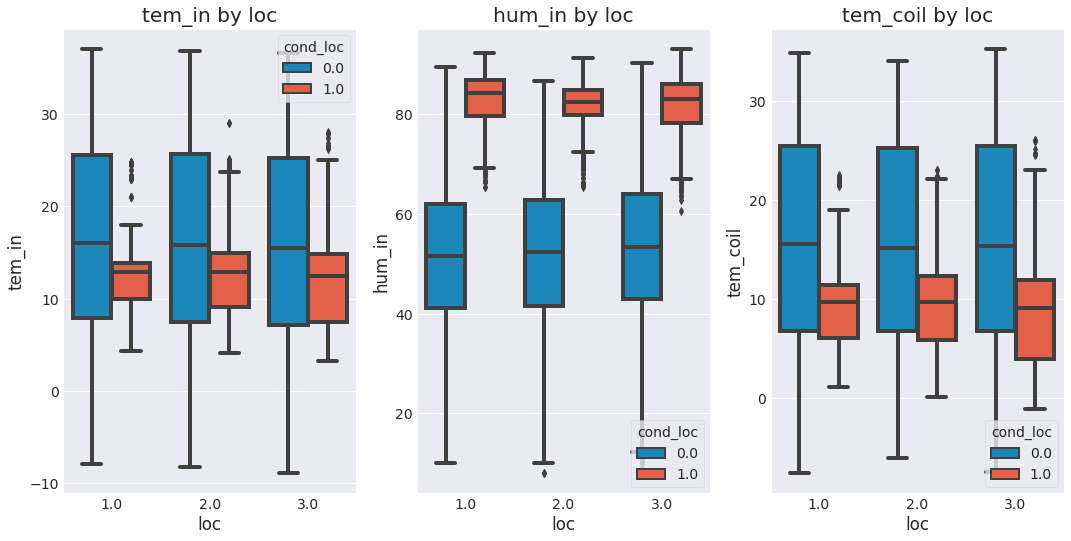

In [ ]:
# 각 loc별 결로여부에 따른 차이
fig, (axis1, axis2, axis3) = plt.subplots(1, 3,figsize=(16,8))

a1 = sns.boxplot(x = 'loc', y = 'tem_in', hue = 'cond_loc', data = data_plant_total, ax = axis1)
a1.legend(loc="upper right", title = 'cond_loc')
a1.set_title('tem_in by loc')

a2 = sns.boxplot(x = 'loc', y = 'hum_in', hue = 'cond_loc', data = data_plant_total, ax = axis2)
a2.legend(loc="lower right", title = 'cond_loc')
a2.set_title('hum_in by loc')

a3 = sns.boxplot(x = 'loc', y ='tem_coil', hue = 'cond_loc', data = data_plant_total, ax = axis3)
a3.legend(loc="lower right", title = 'cond_loc')
a3.set_title('tem_coil by loc')


위 boxplot을 보면 loc도 마찬가지로 결로 여부에 따라 각 변수들이 확연한 차이를 갖는 것을 알 수 있다.

In [ ]:
# 분산분석으로 유의미한지 판단

model1 = ols('tem_in ~ C(cond_loc) * C(loc)', data_plant_total).fit()
model1 = anova_lm(model1)
# print(model1)
print(' tem_in ~ cond_loc * loc')
for i in range(3):
  print(f'분산분석 결과 {model1.index[i]} : F={round(model1.iloc[i, 3], 2)}, p={round(model1.iloc[i, 4], 6)}')
  if round(model1.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model2 = ols('hum_in ~ C(cond_loc) * C(loc)', data_plant_total).fit()
model2 = anova_lm(model2)
# print(model2)
print('\n', 'hum_in ~ cond_loc * loc')
for i in range(3):
  print(f'분산분석 결과 {model2.index[i]} : F={round(model2.iloc[i, 3], 2)}, p={round(model2.iloc[i, 4], 6)}')
  if round(model2.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model3 = ols('tem_coil ~ C(cond_loc) * C(loc)', data_plant_total).fit()
model3 = anova_lm(model3)
# print(model3)
print('\n','tem_coil ~ cond_loc * loc')
for i in range(3):
  print(f'분산분석 결과 {model3.index[i]} : F={round(model3.iloc[i, 3], 2)}, p={round(model3.iloc[i, 4], 6)}')
  if round(model3.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

 tem_in ~ cond_loc * loc
분산분석 결과 C(cond_loc) : F=239.34, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(loc) : F=125.53, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(loc) : F=1.13, p=0.324047
P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.

 hum_in ~ cond_loc * loc
분산분석 결과 C(cond_loc) : F=9434.66, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(loc) : F=509.65, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(loc) : F=5.09, p=0.006156
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.

 tem_coil ~ cond_loc * loc
분산분석 결과 C(cond_loc) : F=739.81, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(loc) : F=12.25, p=5e-06
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(loc) : F=3.29, p=0.037306
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


In [ ]:
# tem_in에 대한 type 2 anova

model1 = ols('tem_in ~ C(cond_loc) * C(loc)', data_plant_total).fit()
model1 = anova_lm(model1, typ=2)
print(model1)
print(' tem_in ~ cond_loc * loc')
for i in range(2):
  print(f'분산분석 결과 {model1.index[i]} : F={round(model1.iloc[i, 2], 2)}, p={round(model1.iloc[i, 3], 6)}')
  if round(model1.iloc[i, 3], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

                          sum_sq        df           F        PR(>F)
C(cond_loc)         2.354892e+04       1.0  237.734140  1.277695e-53
C(loc)              2.486968e+04       2.0  125.533847  3.168601e-55
C(cond_loc):C(loc)  2.232459e+02       2.0    1.126871  3.240468e-01
Residual            3.470515e+07  350360.0         NaN           NaN
 tem_in ~ cond_loc * loc
분산분석 결과 C(cond_loc) : F=237.73, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(loc) : F=125.53, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


앞서 유의미성을 파악하기 위해 진행한 분산분석에서 내부 온도에 대해서 결로여부와 loc간의 상호작용효과만 유의미하지 못했고, 이를 제외한 모든 변수와 상호작용효과에 대해서는 유의미함을 볼 수 있었다.

즉, 결로 여부에 따른 내부 온도에 있어서 loc은 유의미한 차이를 만들어내지 못한다고 할 수 있다.

Text(0.5, 1.0, 'tem_coil by loc at plant2')

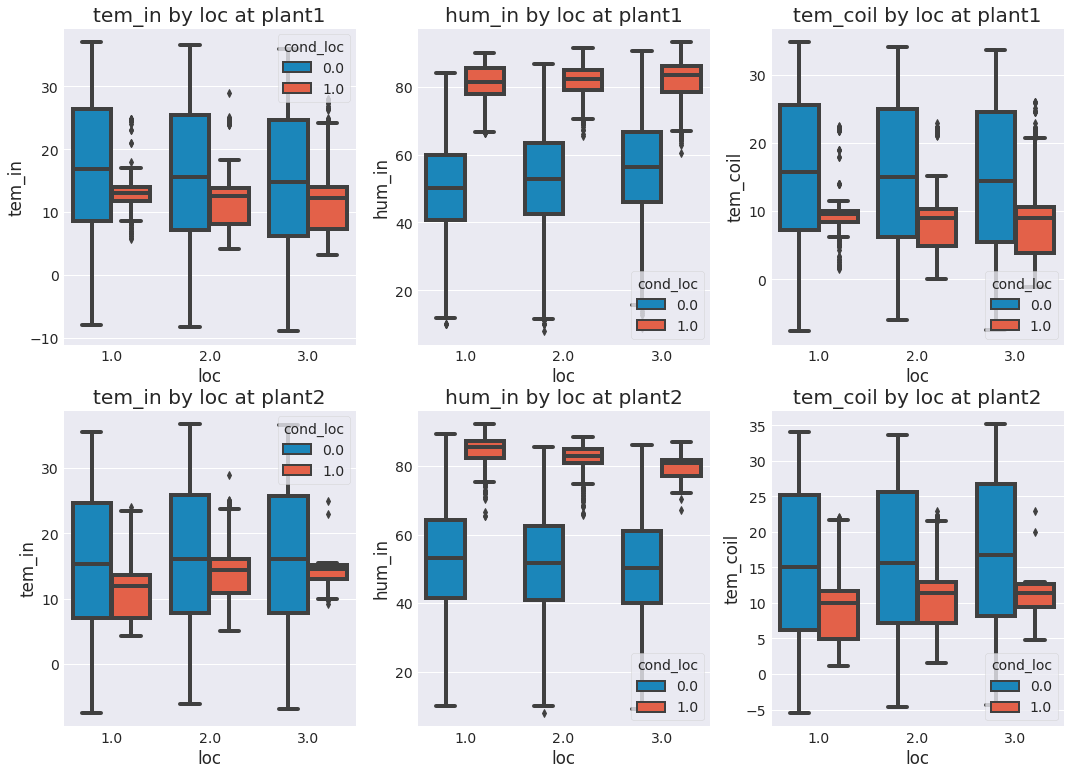

In [ ]:
# 각 공장별 loc들의 결로여부에 따른 차이
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

# plant1
a1 = sns.boxplot(x = 'loc', y = 'tem_in', hue = 'cond_loc', data = data_plant1, ax = saxis[0,0])
a1.legend(loc="upper right", title = 'cond_loc')
a1.set_title('tem_in by loc at plant1')

a2 = sns.boxplot(x = 'loc', y = 'hum_in', hue = 'cond_loc', data = data_plant1, ax = saxis[0,1])
a2.legend(loc="lower right", title = 'cond_loc')
a2.set_title('hum_in by loc at plant1')

a3 = sns.boxplot(x = 'loc', y ='tem_coil', hue = 'cond_loc', data = data_plant1, ax = saxis[0,2])
a3.legend(loc="lower right", title = 'cond_loc')
a3.set_title('tem_coil by loc at plant1')

# plant2
b1 = sns.boxplot(x = 'loc', y = 'tem_in', hue = 'cond_loc', data = data_plant2, ax = saxis[1,0])
b1.legend(loc="upper right", title = 'cond_loc')
b1.set_title('tem_in by loc at plant2')

b2 = sns.boxplot(x = 'loc', y = 'hum_in', hue = 'cond_loc', data = data_plant2, ax = saxis[1,1])
b2.legend(loc="lower right", title = 'cond_loc')
b2.set_title('hum_in by loc at plant2')

b3 = sns.boxplot(x = 'loc', y ='tem_coil', hue = 'cond_loc', data = data_plant2, ax = saxis[1,2])
b3.legend(loc="lower right", title = 'cond_loc')
b3.set_title('tem_coil by loc at plant2')


앞서 결로 여부에 따라 공장, loc을 나눠서 보여준 것을 각각 공장의 loc마다 그린 것. 둘 다 비슷하게 결로여부에 따라 확연한 차이를 보인다.

### 결로 여부에 따른 일교차 시각화

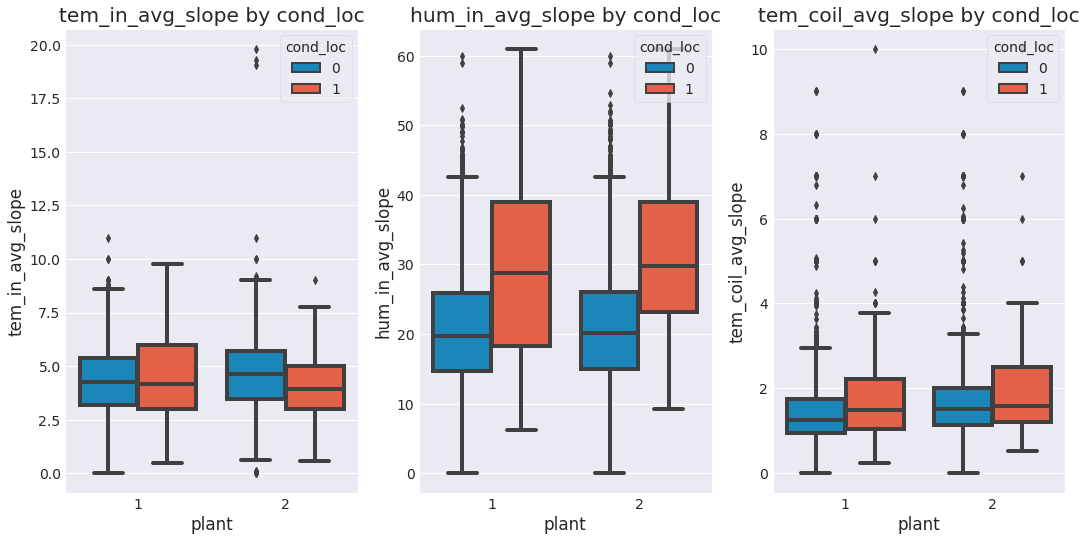

In [ ]:
# 결로 여부에 따라 공장들간 내부 온도, 습도, 코일온도 일교차 차이 비교
fig, (axis1, axis2, axis3) = plt.subplots(1, 3,figsize=(16,8))

sns.boxplot(x = 'plant', y = 'tem_in_avg_slope', hue = "cond_loc", data=data_plant_slope_total, ax= axis1)
axis1.set_title('tem_in_avg_slope by cond_loc')
axis1.legend(loc="upper right", title = 'cond_loc')

sns.boxplot(x = 'plant', y = 'hum_in_avg_slope', hue = "cond_loc", data=data_plant_slope_total, ax= axis2)
axis2.set_title('hum_in_avg_slope by cond_loc')
axis2.legend(loc="upper right", title = 'cond_loc')

sns.boxplot(x = 'plant', y = 'tem_coil_avg_slope', hue = "cond_loc", data=data_plant_slope_total, ax= axis3)
axis3.set_title('tem_coil_avg_slope by cond_loc')
axis3.legend(loc="upper right", title = 'cond_loc')

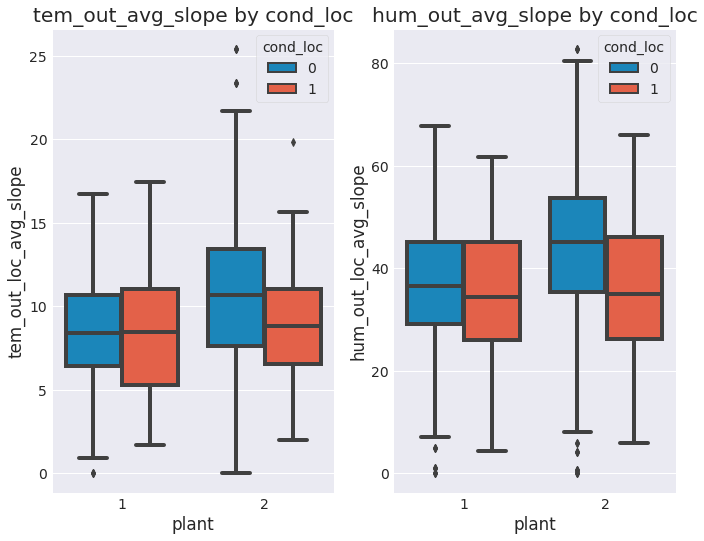

In [ ]:
# 결로 여부에 따라 공장들간 외부 온도, 습도 일교차 차이 비교
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(10,8))

sns.boxplot(x = 'plant', y = 'tem_out_loc_avg_slope', hue = "cond_loc", data=data_plant_slope_total, ax= axis1)
axis1.set_title('tem_out_avg_slope by cond_loc')
axis1.legend(loc="upper right", title = 'cond_loc')

sns.boxplot(x = 'plant', y = 'hum_out_loc_avg_slope', hue = "cond_loc", data=data_plant_slope_total, ax= axis2)
axis2.set_title('hum_out_avg_slope by cond_loc')
axis2.legend(loc="upper right", title = 'cond_loc')


위 5개의 boxplot을 보면 각각 공장마다 결로 여부에 따라 모든 변수에 대해 차이를 보인다. 특히, 내부 습도의 경우, 공장에 상관없이 결로 발생시 상대적으로 높은 수치의 평균을 갖는다.

특히, 공장 내부 습도는 결로 발생시 평상시보다 습도가 상대적으로 높은데, 공장 외부 습도는 오히려 상대적으로 낮다는 점이 눈에 띈다. 수치적으로 비교해보면, 결로가 발생했을 때 내외부 습도의 평균은 공장에 상관없이 큰 차이가 없으나, 평상시에는 내부 습도가 외부의 절반 밖에 되지 않는다. 이는 습도가 같는 영향력이 큰다는 것을 간접적으로 시사한다고 볼 수 있다.

In [ ]:
# 분산분석으로 유의미한지 판단

model1 = ols('tem_in_avg_slope ~ C(cond_loc) * C(plant)', data_plant_slope_total).fit()
model1 = anova_lm(model1)
# print(model1)
print(' tem_in_avg_slope ~ cond_loc * plant')
for i in range(3):
  print(f'분산분석 결과 {model1.index[i]} : F={round(model1.iloc[i, 3], 2)}, p={round(model1.iloc[i, 4], 6)}')
  if round(model1.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model2 = ols('hum_in_avg_slope ~ C(cond_loc) * C(plant)', data_plant_slope_total).fit()
model2 = anova_lm(model2)
# print(model2)
print('\n', 'hum_in_avg_slope ~ cond_loc * plant')
for i in range(3):
  print(f'분산분석 결과 {model2.index[i]} : F={round(model2.iloc[i, 3], 2)}, p={round(model2.iloc[i, 4], 6)}')
  if round(model2.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model3 = ols('tem_coil_avg_slope ~ C(cond_loc) * C(plant)', data_plant_slope_total).fit()
model3 = anova_lm(model3)
# print(model3)
print('\n','tem_coil_avg_slope ~ cond_loc * plant')
for i in range(3):
  print(f'분산분석 결과 {model3.index[i]} : F={round(model3.iloc[i, 3], 2)}, p={round(model3.iloc[i, 4], 6)}')
  if round(model3.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model4 = ols('tem_out_loc_avg_slope ~ C(cond_loc) * C(plant)', data_plant_slope_total).fit()
model4 = anova_lm(model4)
# print(model4)
print('\n','tem_out_avg_slope ~ cond_loc * plant')
for i in range(3):
  print(f'분산분석 결과 {model4.index[i]} : F={round(model4.iloc[i, 3], 2)}, p={round(model4.iloc[i, 4], 6)}')
  if round(model4.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model5 = ols('hum_out_loc_avg_slope ~ C(cond_loc) * C(plant)', data_plant_slope_total).fit()
model5 = anova_lm(model5)
# print(model5)
print('\n','hum_out_avg_slope ~ cond_loc * plant')
for i in range(3):
  print(f'분산분석 결과 {model5.index[i]} : F={round(model5.iloc[i, 3], 2)}, p={round(model5.iloc[i, 4], 6)}')
  if round(model5.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

 tem_in_avg_slope ~ cond_loc * plant
분산분석 결과 C(cond_loc) : F=1.7, p=0.192373
P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.
분산분석 결과 C(plant) : F=46.03, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(plant) : F=13.52, p=0.000238
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.

 hum_in_avg_slope ~ cond_loc * plant
분산분석 결과 C(cond_loc) : F=176.89, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(plant) : F=5.37, p=0.020566
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(plant) : F=3.23, p=0.072505
P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.

 tem_coil_avg_slope ~ cond_loc * plant
분산분석 결과 C(cond_loc) : F=34.46, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(plant) : F=81.84, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(plant) : F=0.31, p=0.578223
P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.

 tem_out_avg_slope ~ cond_loc * 

In [ ]:
# tem_coil과 hum_in에 대한 type 2 anova

model1 = ols('hum_in_avg_slope ~ C(cond_loc) * C(plant)', data_plant_slope_total).fit()
model1 = anova_lm(model1, typ=2)
print(model1)
print('\n','hum_in_avg_slope ~ cond_loc * plant')
for i in range(2):
  print(f'분산분석 결과 {model1.index[i]} : F={round(model1.iloc[i, 2], 2)}, p={round(model1.iloc[i, 3], 6)}')
  if round(model1.iloc[i, 3], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model2 = ols('tem_coil_avg_slope ~ C(cond_loc) * C(plant)', data_plant_slope_total).fit()
model2 = anova_lm(model2, typ=2)
print(model2)
print('\n','tem_coil_avg_slope ~ cond_loc * plant')
for i in range(2):
  print(f'분산분석 결과 {model2.index[i]} : F={round(model2.iloc[i, 2], 2)}, p={round(model2.iloc[i, 3], 6)}')
  if round(model2.iloc[i, 3], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

                             sum_sq      df           F        PR(>F)
C(cond_loc)            14686.364159     1.0  179.889349  1.781019e-40
C(plant)                 438.076914     1.0    5.365887  2.056554e-02
C(cond_loc):C(plant)     263.410048     1.0    3.226439  7.250488e-02
Residual              526258.524923  6446.0         NaN           NaN

 hum_in_avg_slope ~ cond_loc * plant
분산분석 결과 C(cond_loc) : F=179.89, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(plant) : F=5.37, p=0.020566
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
                           sum_sq      df          F        PR(>F)
C(cond_loc)             36.750789     1.0  40.799628  1.804271e-10
C(plant)                73.720405     1.0  81.842191  1.919071e-19
C(cond_loc):C(plant)     0.278469     1.0   0.309148  5.782225e-01
Residual              5806.317292  6446.0        NaN           NaN

 tem_coil_avg_slope ~ cond_loc * plant
분산분석 결과 C(cond_loc) : F=40.8, p=0.0
P-value 값이 충분히 작음으로 인해 

분산분석 결과, 내부 코일온도와 내부 습도의 일교차는 공장에 대해서 결로여부와의 상호작용효과 유의미하지 않지만, 나머지에 있어서는 유의미한 결과를 볼 수 있다.

즉, 결로여부에 따른 내부 코일 온도와 내부 습도는 공장에 따른 차이를 보이지 않는다는 결과를 얻을 수 있다. 또한, 앞서 공장만 시각화해서 봤을 때 처럼 내부 온도의 일교차는 공장의 영향을 유의미하게 받지 않는다.

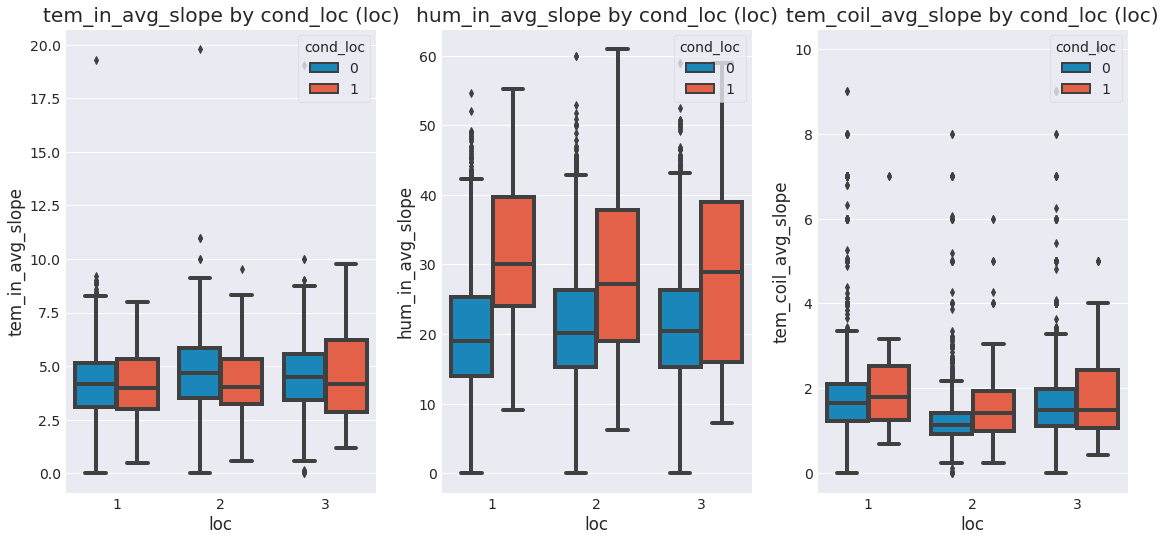

In [ ]:
# 결로 여부에 따라 loc들간 내부 온도, 습도, 코일온도 일교차 차이 비교
fig, (axis1, axis2, axis3) = plt.subplots(1, 3,figsize=(17,8))

sns.boxplot(x = 'loc', y = 'tem_in_avg_slope', hue = "cond_loc", data=data_plant_slope_total, ax= axis1)
axis1.set_title('tem_in_avg_slope by cond_loc (loc)')
axis1.legend(loc="upper right", title = 'cond_loc')

sns.boxplot(x = 'loc', y = 'hum_in_avg_slope', hue = "cond_loc", data=data_plant_slope_total, ax= axis2)
axis2.set_title('hum_in_avg_slope by cond_loc (loc)')
axis2.legend(loc="upper right", title = 'cond_loc')

sns.boxplot(x = 'loc', y = 'tem_coil_avg_slope', hue = "cond_loc", data=data_plant_slope_total, ax= axis3)
axis3.set_title('tem_coil_avg_slope by cond_loc (loc)')
axis3.legend(loc="upper right", title = 'cond_loc')

In [ ]:
# 분산분석으로 유의미한지 판단

model1 = ols('tem_in_avg_slope ~ C(cond_loc) * C(loc)', data_plant_slope_total).fit()
model1 = anova_lm(model1)
# print(model1)
print(' tem_in_avg_slope ~ cond_loc * loc')
for i in range(3):
  print(f'분산분석 결과 {model1.index[i]} : F={round(model1.iloc[i, 3], 2)}, p={round(model1.iloc[i, 4], 6)}')
  if round(model1.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model2 = ols('hum_in_avg_slope ~ C(cond_loc) * C(loc)', data_plant_slope_total).fit()
model2 = anova_lm(model2)
# print(model2)
print('\n', 'hum_in_avg_slope ~ cond_loc * loc')
for i in range(3):
  print(f'분산분석 결과 {model2.index[i]} : F={round(model2.iloc[i, 3], 2)}, p={round(model2.iloc[i, 4], 6)}')
  if round(model2.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model3 = ols('tem_coil_avg_slope ~ C(cond_loc) * C(loc)', data_plant_slope_total).fit()
model3 = anova_lm(model3)
# print(model3)
print('\n','tem_coil_avg_slope ~ cond_loc * loc')
for i in range(3):
  print(f'분산분석 결과 {model3.index[i]} : F={round(model3.iloc[i, 3], 2)}, p={round(model3.iloc[i, 4], 6)}')
  if round(model3.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

 tem_in_avg_slope ~ cond_loc * loc
분산분석 결과 C(cond_loc) : F=1.71, p=0.191359
P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.
분산분석 결과 C(loc) : F=43.94, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(loc) : F=1.72, p=0.178632
P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.

 hum_in_avg_slope ~ cond_loc * loc
분산분석 결과 C(cond_loc) : F=177.46, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(loc) : F=10.32, p=3.4e-05
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(loc) : F=5.37, p=0.00466
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.

 tem_coil_avg_slope ~ cond_loc * loc
분산분석 결과 C(cond_loc) : F=36.24, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(loc) : F=209.44, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(loc) : F=1.49, p=0.226385
P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.


In [ ]:
# tem_coil과 tem_in에 대한 type 2 anova

model1 = ols('tem_in_avg_slope ~ C(cond_loc) * C(loc)', data_plant_slope_total).fit()
model1 = anova_lm(model1, typ=2)
print(model1)
print('\n','tem_in_avg_slope ~ cond_loc * loc')
for i in range(2):
  print(f'분산분석 결과 {model1.index[i]} : F={round(model1.iloc[i, 2], 2)}, p={round(model1.iloc[i, 3], 6)}')
  if round(model1.iloc[i, 3], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

model2 = ols('tem_coil_avg_slope ~ C(cond_loc) * C(loc)', data_plant_slope_total).fit()
model2 = anova_lm(model2, typ=2)
print(model2)
print('\n','tem_coil_avg_slope ~ cond_loc * loc')
for i in range(2):
  print(f'분산분석 결과 {model2.index[i]} : F={round(model2.iloc[i, 2], 2)}, p={round(model2.iloc[i, 3], 6)}')
  if round(model2.iloc[i, 3], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

                          sum_sq      df          F        PR(>F)
C(cond_loc)             6.094264     1.0   2.270072  1.319428e-01
C(loc)                235.928442     2.0  43.940869  1.110909e-19
C(cond_loc):C(loc)      9.250565     2.0   1.722886  1.786323e-01
Residual            17299.645268  6444.0        NaN           NaN

 tem_in_avg_slope ~ cond_loc * loc
분산분석 결과 C(cond_loc) : F=2.27, p=0.131943
P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.
분산분석 결과 C(loc) : F=43.94, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
                         sum_sq      df           F        PR(>F)
C(cond_loc)           33.826463     1.0   39.495800  3.502477e-10
C(loc)               358.760748     2.0  209.444642  7.474685e-89
C(cond_loc):C(loc)     2.545156     2.0    1.485863  2.263845e-01
Residual            5519.010263  6444.0         NaN           NaN

 tem_coil_avg_slope ~ cond_loc * loc
분산분석 결과 C(cond_loc) : F=39.5, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니

해석필요

### 결론

크게 3가지 결론을 얻을 수 있었다.

1. 결로가 맺히는 코일의 표면과 가장 직접적으로 연관이 있는 내부 온도, 내부 코일 온도, 내부 습도 간에 있어서, 내부 온도와 내부 코일 온도의 차이값(내부온도 - 내부 코일온도)과 내부 습도간의 연관성을 파악할 수 있었다. 결로 발생시, 내부 온도와 내부 코일 온도의 차이가 평상시보다 3도가량 높았으며, 그 때 내부 습도가 70 이상으로 높으면 결로가 발생하였다.

2. 결로 발생에 있어서 공장과 loc이 큰 영향력을 갖지 못했다. 공장, loc 각각은 feature들에 있어서 유의미성을 가졌지만 결로 여부에 따른 각 feature에 대해서는 그렇지 못했다. 단, 외부 feature는 결로 여부에 따라 공장들간에 유의미한 차이를 보였다. 

이 점을 고려하여, 외부 feature을 잘 활용하여 결로 예측 모델에 쓰면 좋을 것 같다.

3. 결로 여부에 따른 일교차도 충분히 유의미한 차이를 가진다.



## 월별에 따른 시각화

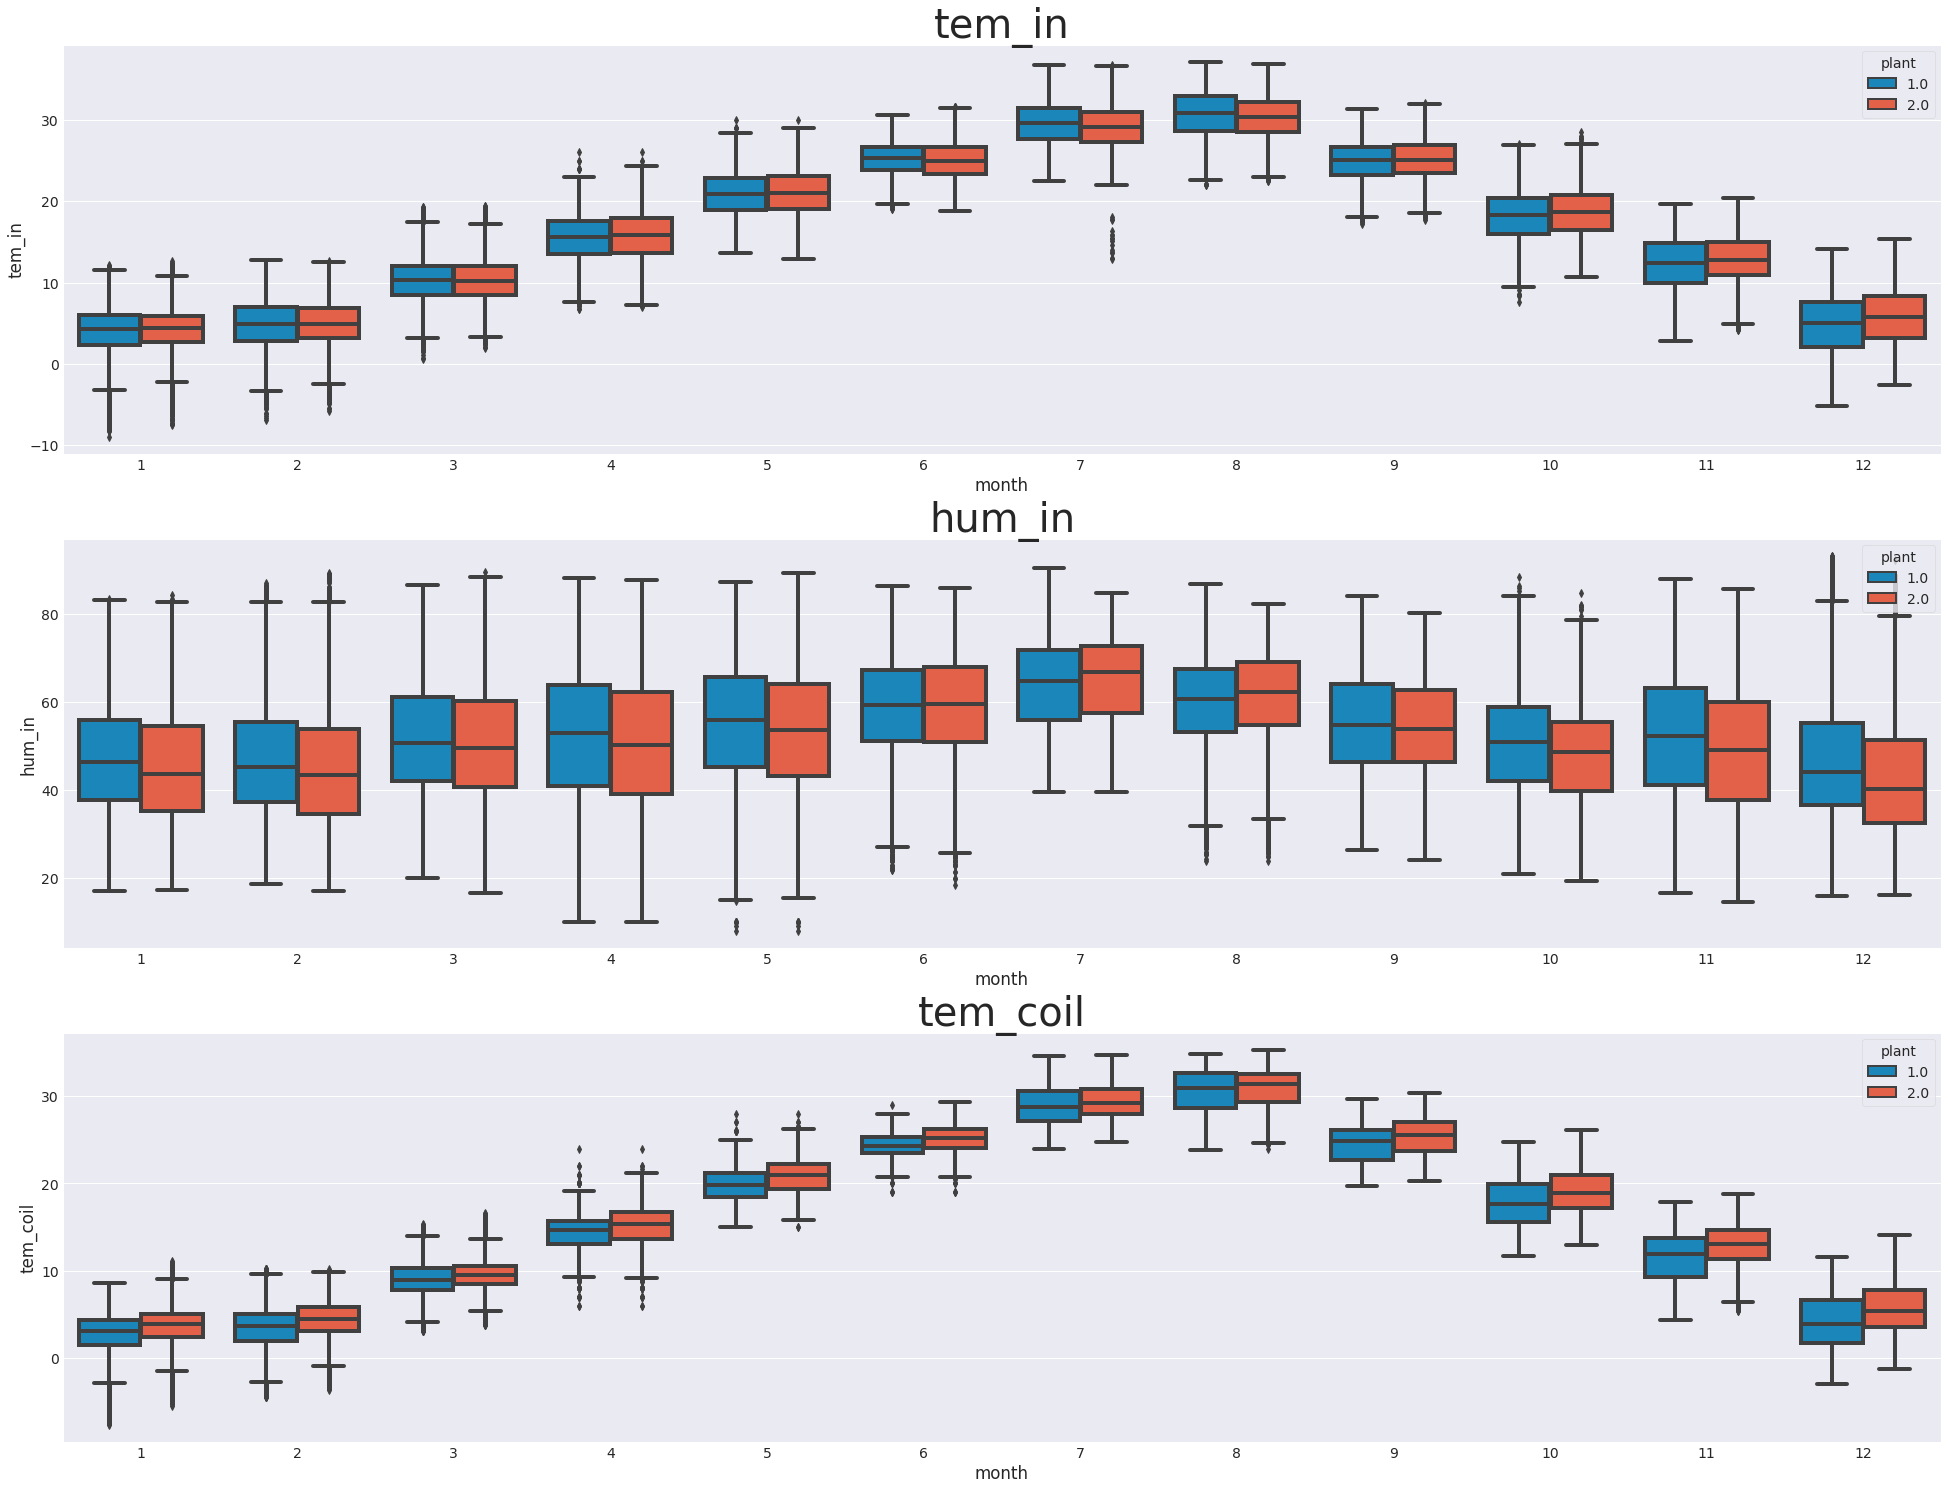

In [ ]:
# 월별 공장별 각 내부 데이터 비교
fig, (axis1, axis2, axis3) = plt.subplots(3,1,figsize=(30,24))

sns.boxplot(x = 'month', y = 'tem_in', hue = 'plant', data = data_plant_total, ax = axis1)
axis1.set_title('tem_in', fontsize= 40)
axis1.legend(loc="upper right", title = 'plant')

sns.boxplot(x = 'month', y = 'hum_in', hue = 'plant', data = data_plant_total, ax = axis2)
axis2.set_title('hum_in', fontsize= 40)
axis2.legend(loc="upper right", title = 'plant')

sns.boxplot(x = 'month', y = 'tem_coil', hue = 'plant', data = data_plant_total, ax = axis3)
axis3.set_title('tem_coil', fontsize= 40)
axis3.legend(loc="upper right", title = 'plant')

boxplot을 보면 온도와 습도의 흐름이 두 공장 모두 시간적 흐름에 영향을 받는다는 것 볼 수 있다.

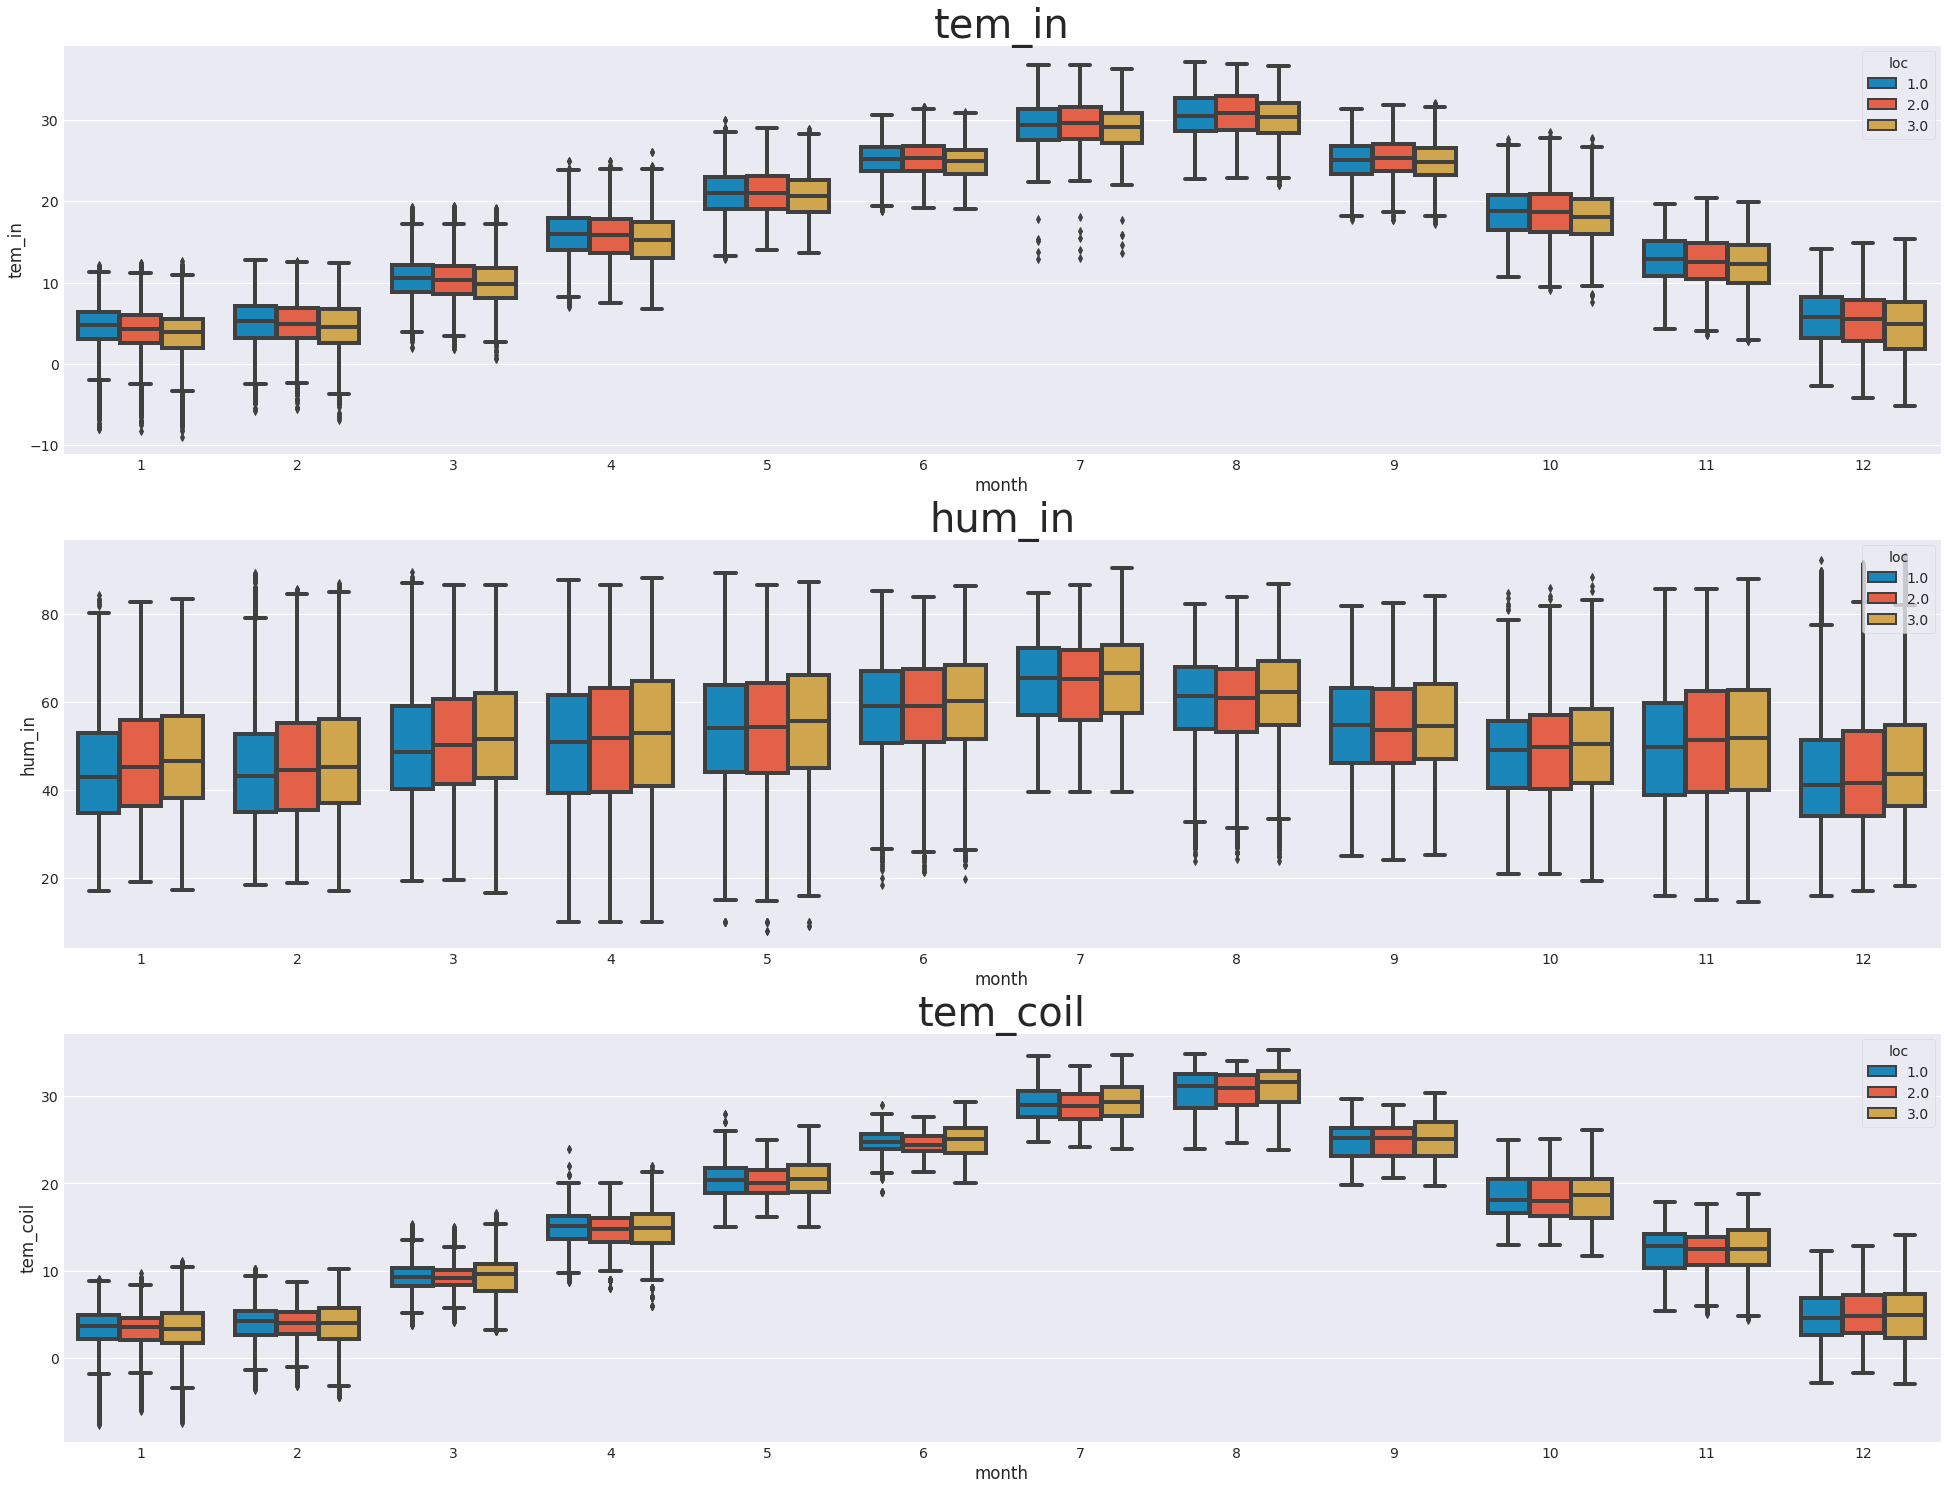

In [ ]:
# 월별 loc별 비교
fig, (axis1, axis2, axis3) = plt.subplots(3,1,figsize=(30,24))

sns.boxplot(x = 'month', y = 'tem_in', hue = 'loc', data = data_plant_total, ax = axis1)
axis1.set_title('tem_in', fontsize=40)
axis1.legend(loc="upper right", title = 'loc')

sns.boxplot(x = 'month', y = 'hum_in', hue = 'loc', data = data_plant_total, ax = axis2)
axis2.set_title('hum_in', fontsize=40)
axis2.legend(loc="upper right", title = 'loc')

sns.boxplot(x = 'month', y = 'tem_coil', hue = 'loc', data = data_plant_total, ax = axis3)
axis3.set_title('tem_coil', fontsize=40)
axis3.legend(loc="upper right", title = 'loc')

위 boxplot에서도 보면, loc에 상관없이 모든 변수가 시간적 흐름에 영향을 받는 것을 볼 수 있다.

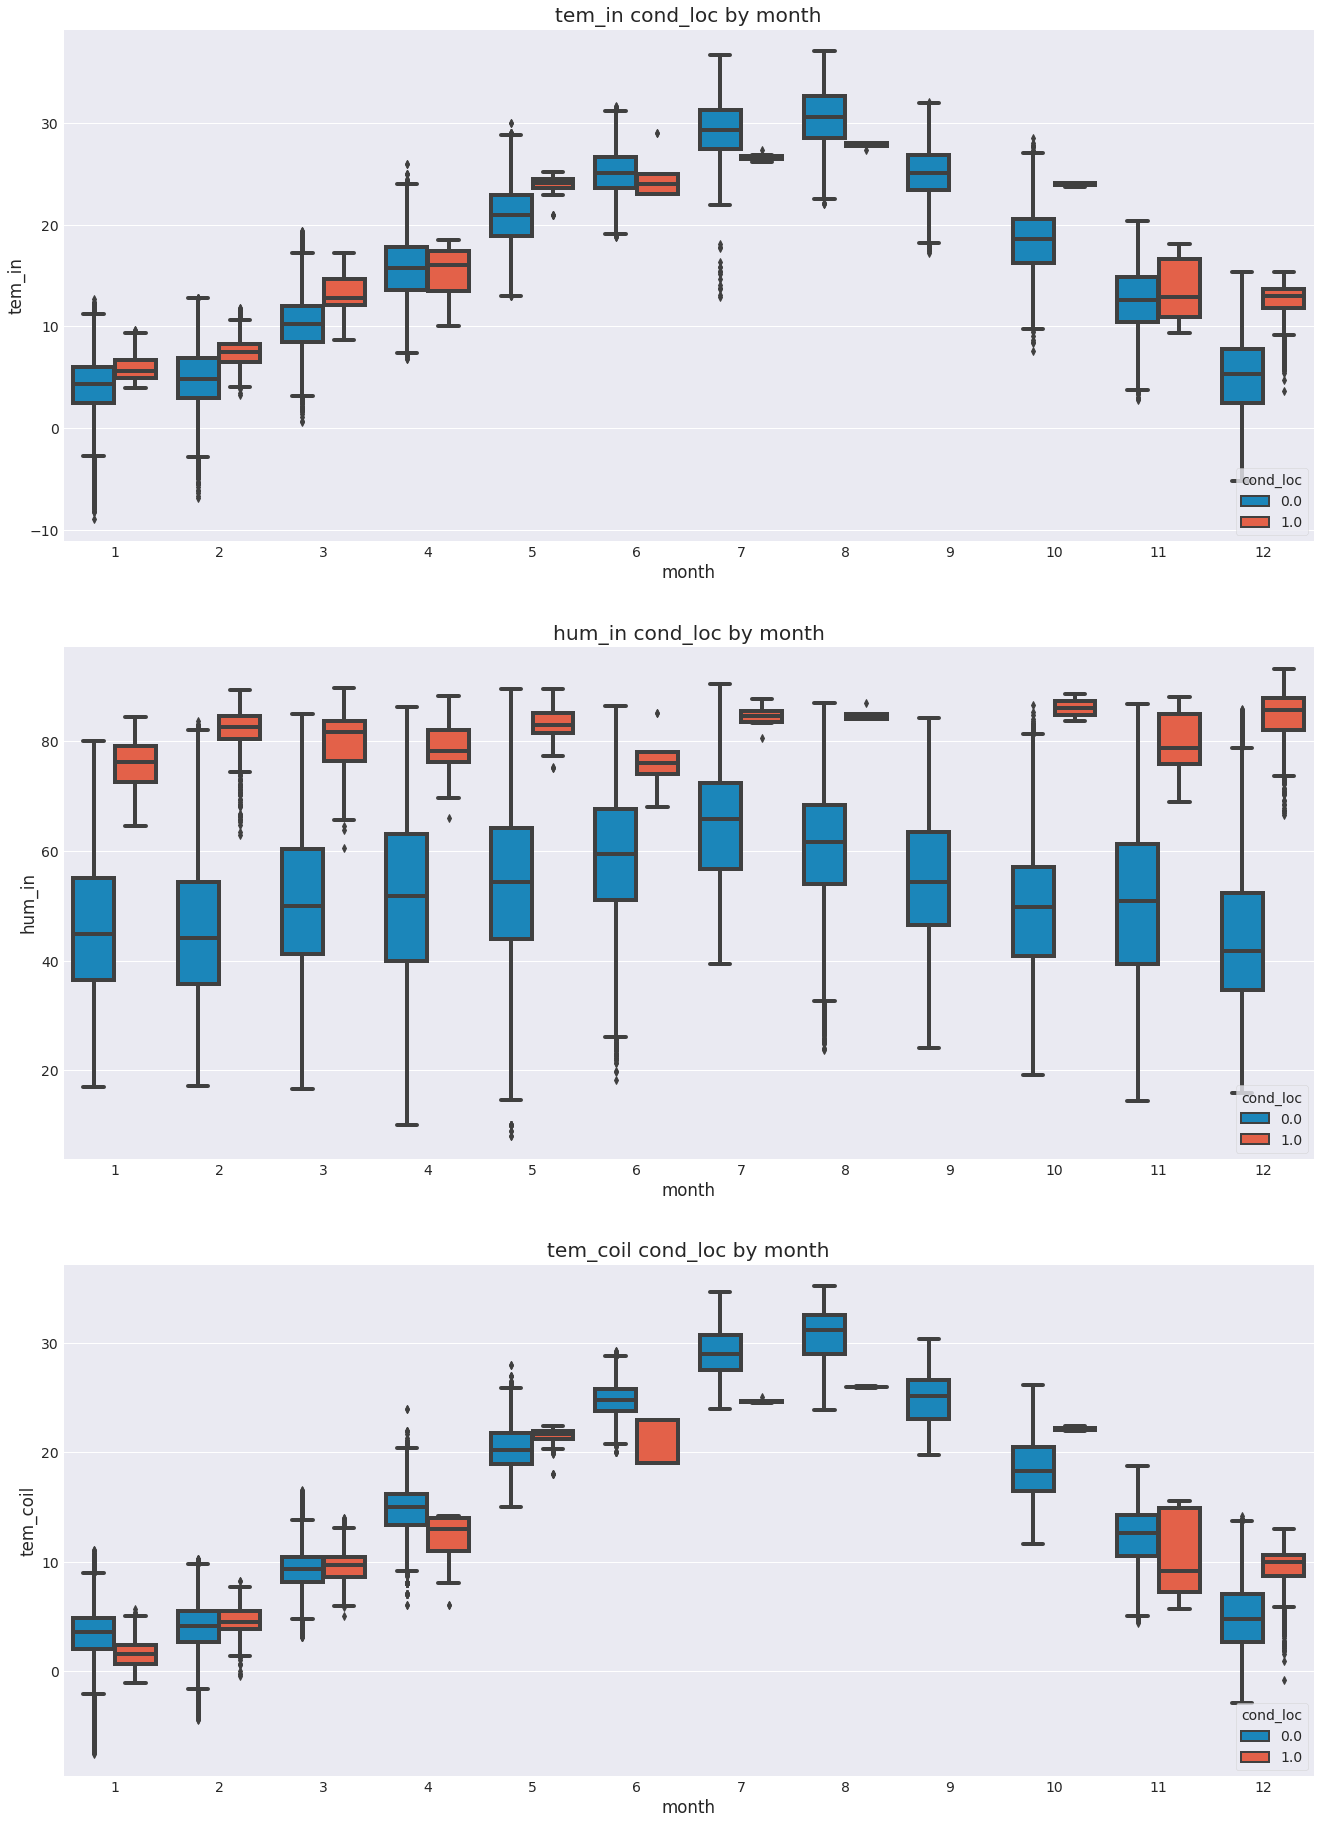

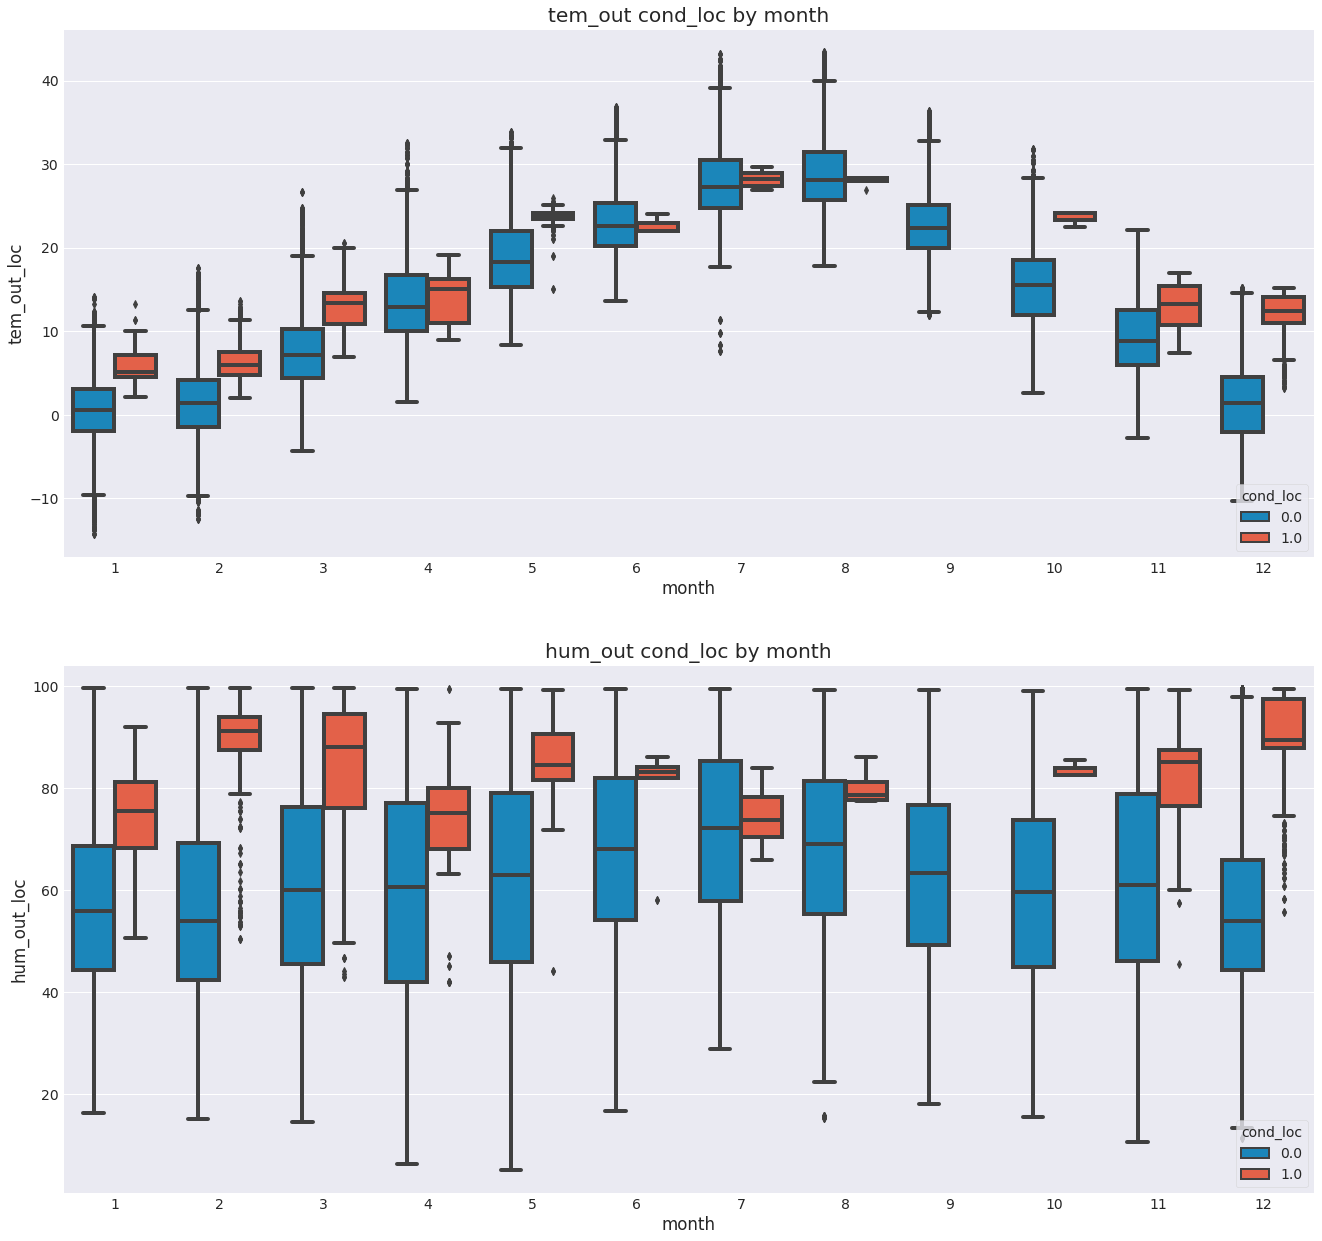

In [ ]:
# 결로 여부에 따른 내부 온도, 습도, 코일 온도의 월별 추이
fig, (axis1, axis2, axis3) = plt.subplots(3,1,figsize=(20,30))

sns.boxplot(x = 'month', y = 'tem_in', hue = 'cond_loc', data = data_plant_total, ax = axis1)
axis1.set_title('tem_in cond_loc by month')
axis1.legend(loc="lower right", title = 'cond_loc')

sns.boxplot(x = 'month', y = 'hum_in', hue = 'cond_loc', data = data_plant_total, ax = axis2)
axis2.set_title('hum_in cond_loc by month')
axis2.legend(loc="lower right", title = 'cond_loc')

sns.boxplot(x = 'month', y = 'tem_coil', hue = 'cond_loc', data = data_plant_total, ax = axis3)
axis3.set_title('tem_coil cond_loc by month')
axis3.legend(loc="lower right", title = 'cond_loc')

# 결로 여부에 따른 외부 온도, 습도의 월별 추이
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(20,20))

sns.boxplot(x = 'month', y = 'tem_out_loc', hue = 'cond_loc', data = data_plant_total, ax = axis1)
axis1.set_title('tem_out cond_loc by month')
axis1.legend(loc="lower right", title = 'cond_loc')

sns.boxplot(x = 'month', y = 'hum_out_loc', hue = 'cond_loc', data = data_plant_total, ax = axis2)
axis2.set_title('hum_out cond_loc by month')
axis2.legend(loc="lower right", title = 'cond_loc')

In [ ]:
# 분산분석으로 유의미한지 판단

model1 = ols('tem_in ~ C(cond_loc) * C(month)', data_plant_total).fit()
model1 = anova_lm(model1)
# print(model1)
print(' tem_in ~ cond_loc * month')
for i in range(3):
  print(f'분산분석 결과 {model1.index[i]} : F={round(model1.iloc[i, 3], 2)}, p={round(model1.iloc[i, 4], 6)}')
  if round(model1.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model2 = ols('hum_in ~ C(cond_loc) * C(month)', data_plant_total).fit()
model2 = anova_lm(model2)
# print(model2)
print('\n', 'hum_in ~ cond_loc * month')
for i in range(3):
  print(f'분산분석 결과 {model2.index[i]} : F={round(model2.iloc[i, 3], 2)}, p={round(model2.iloc[i, 4], 6)}')
  if round(model2.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model3 = ols('tem_coil ~ C(cond_loc) * C(month)', data_plant_total).fit()
model3 = anova_lm(model3)
# print(model3)
print('\n', 'tem_coil ~ cond_loc * month')
for i in range(3):
  print(f'분산분석 결과 {model3.index[i]} : F={round(model3.iloc[i, 3], 2)}, p={round(model3.iloc[i, 4], 6)}')
  if round(model3.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model4 = ols('tem_out_loc ~ C(cond_loc) * C(month)', data_plant_total).fit()
model4 = anova_lm(model4)
# print(model4)
print('\n', 'tem_out ~ cond_loc * month')
for i in range(3):
  print(f'분산분석 결과 {model4.index[i]} : F={round(model4.iloc[i, 3], 2)}, p={round(model4.iloc[i, 4], 6)}')
  if round(model4.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model5 = ols('hum_out_loc ~ C(cond_loc) * C(month)', data_plant_total).fit()
model5 = anova_lm(model5)
# print(model5)
print('\n', 'hum_out ~ cond_loc * month')
for i in range(3):
  print(f'분산분석 결과 {model5.index[i]} : F={round(model5.iloc[i, 3], 2)}, p={round(model5.iloc[i, 4], 6)}')
  if round(model5.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

 tem_in ~ cond_loc * month
분산분석 결과 C(cond_loc) : F=3006.43, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(month) : F=368397.94, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(month) : F=135.18, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.

 hum_in ~ cond_loc * month
분산분석 결과 C(cond_loc) : F=11895.24, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(month) : F=8390.29, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(month) : F=36.15, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.

 tem_coil ~ cond_loc * month
분산분석 결과 C(cond_loc) : F=14465.93, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(month) : F=590810.39, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(month) : F=196.46, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.

 tem_out ~ cond_loc * month
분산분석 결과 C(cond_loc) : F=183.61, p=0.0
P-value 값이 충분히 작음으

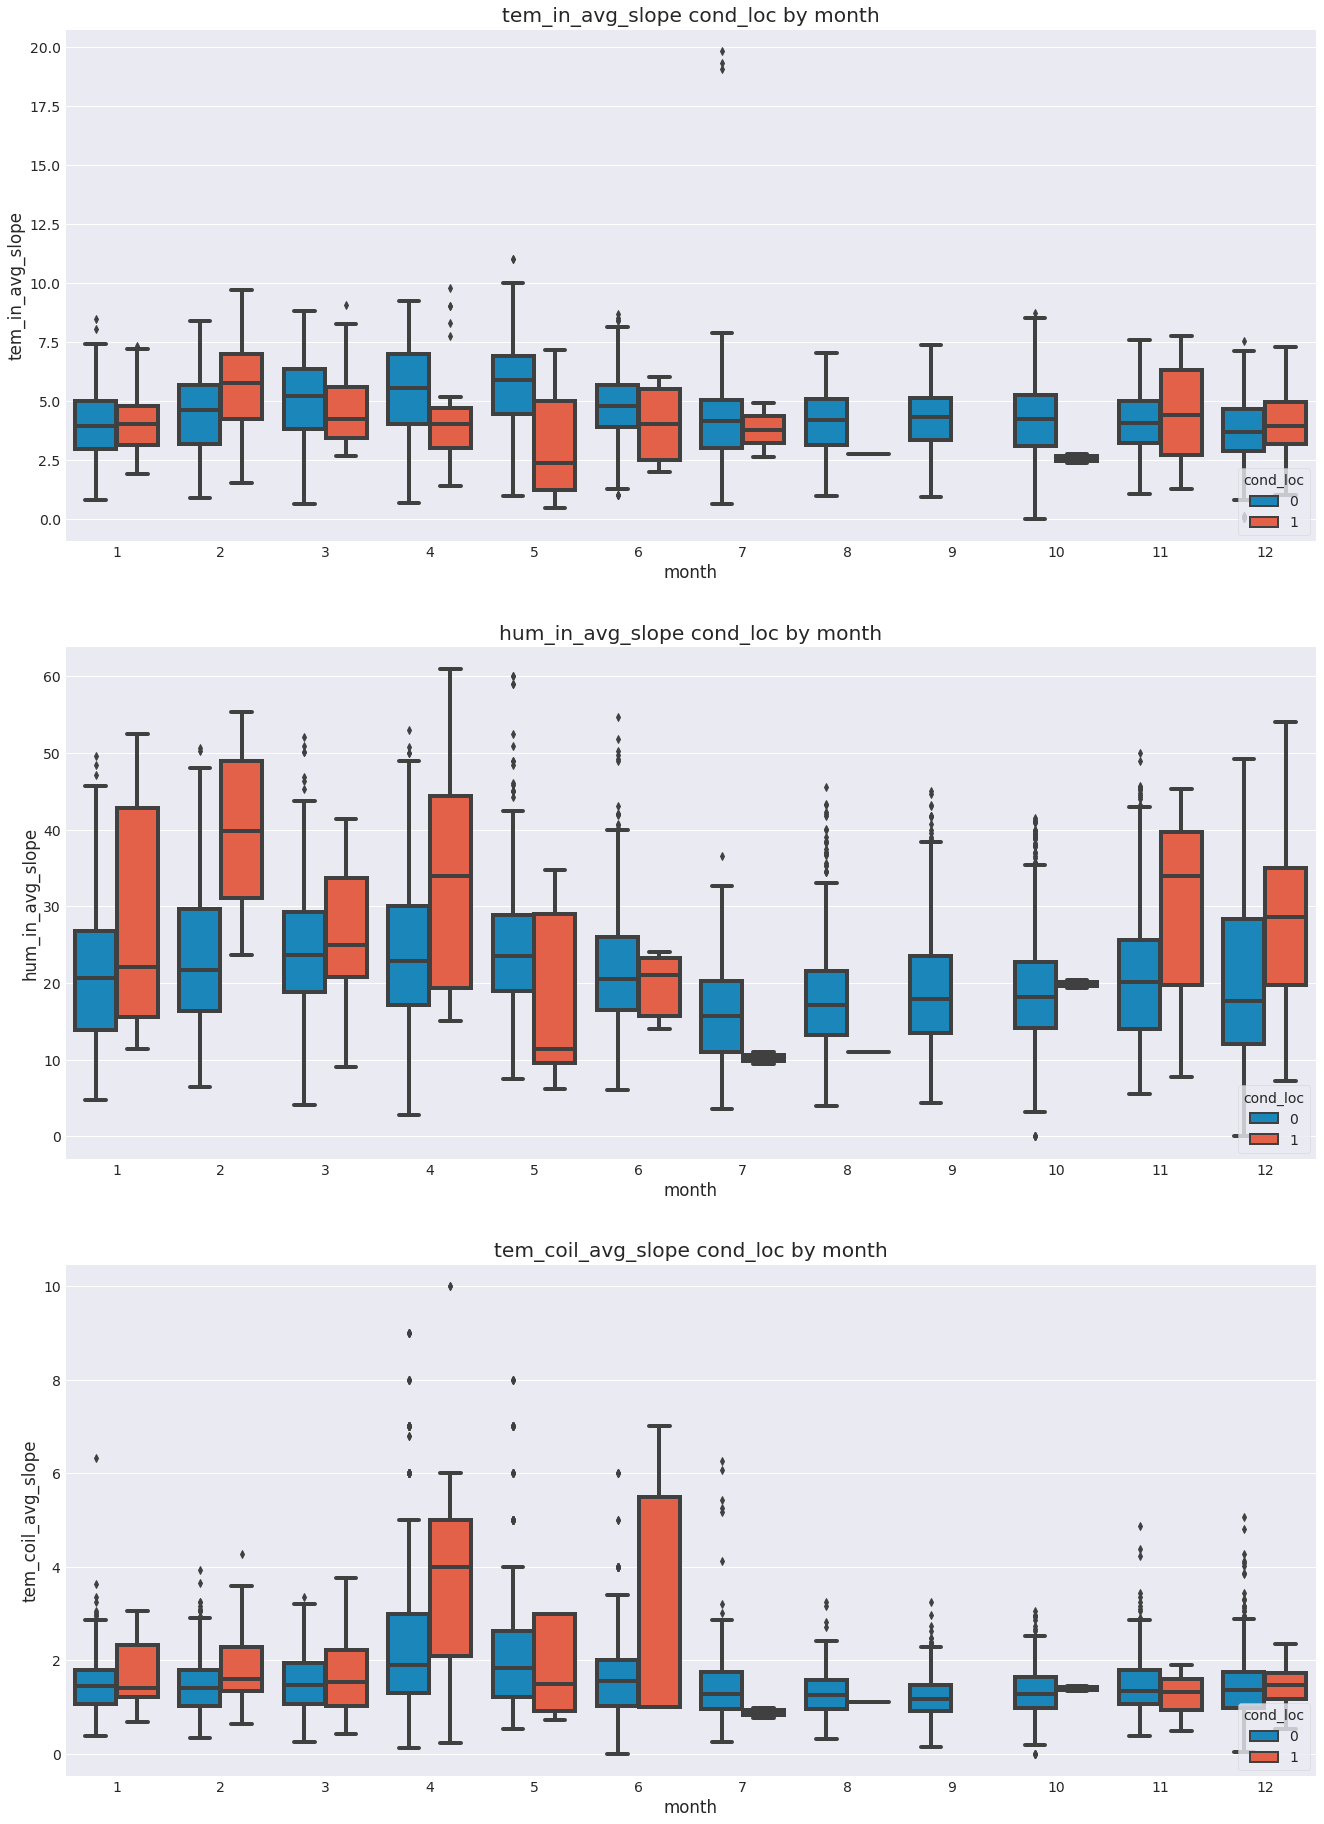

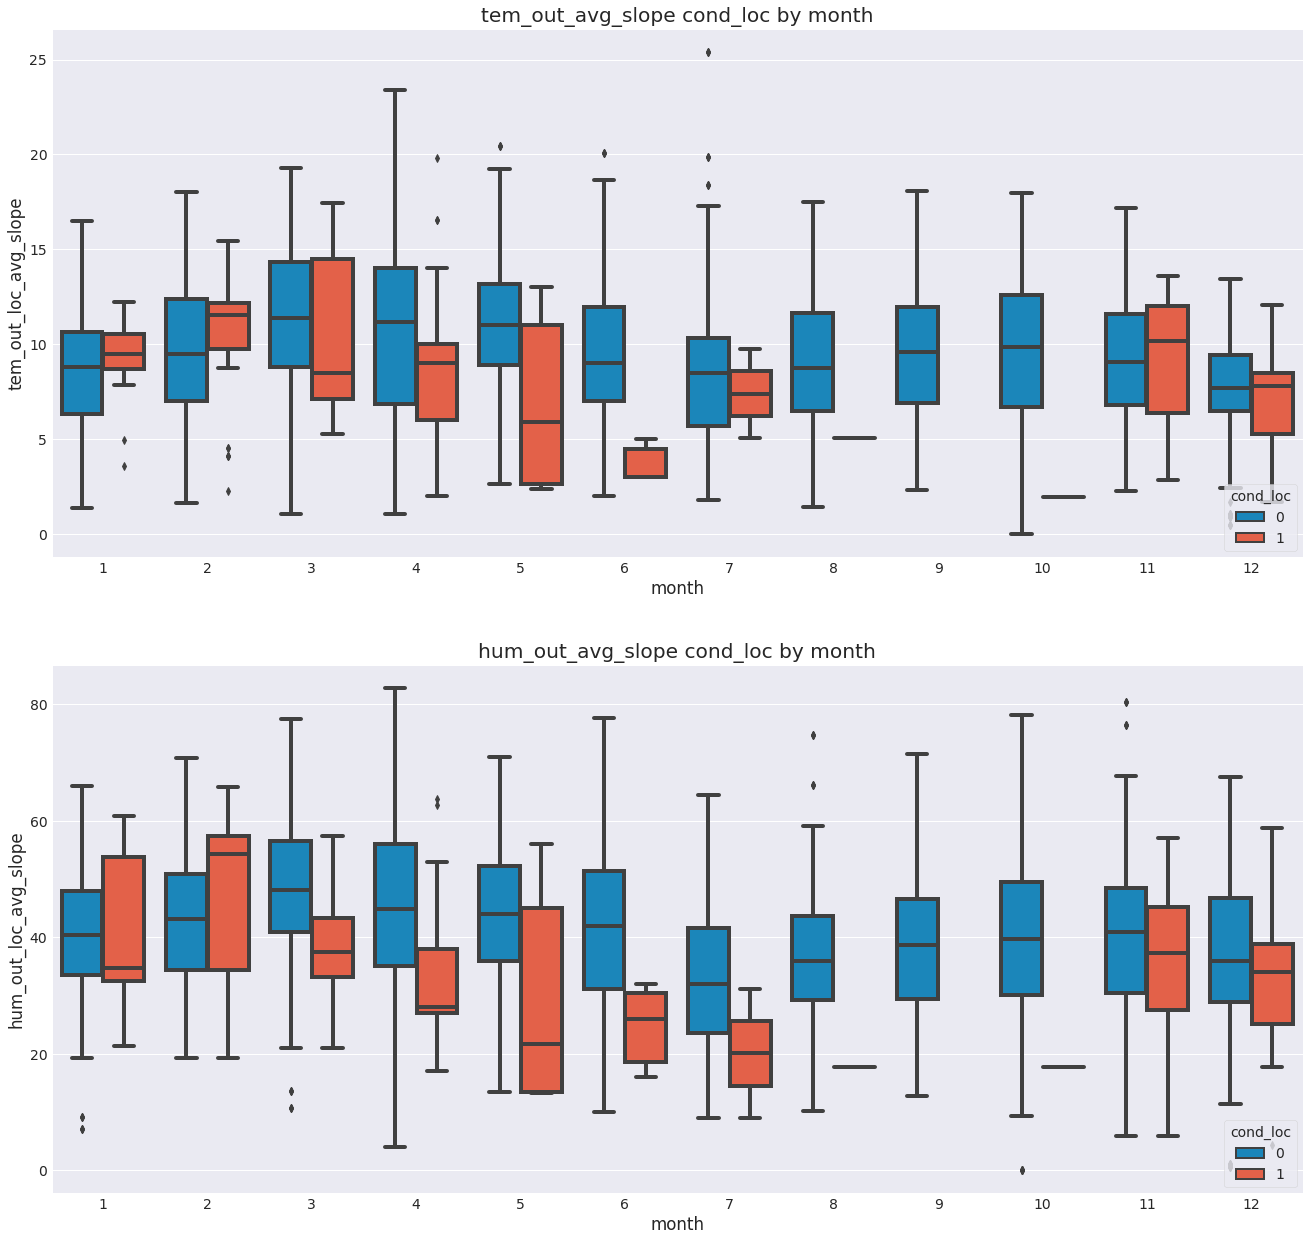

In [ ]:
# 결로 여부에 따른 내부 온도, 습도, 코일 온도 일교차의 월별 추이
fig, (axis1, axis2, axis3) = plt.subplots(3,1,figsize=(20,30))

sns.boxplot(x = 'month', y = 'tem_in_avg_slope', hue = 'cond_loc', data = data_plant_slope_total, ax = axis1)
axis1.set_title('tem_in_avg_slope cond_loc by month')
axis1.legend(loc="lower right", title = 'cond_loc')

sns.boxplot(x = 'month', y = 'hum_in_avg_slope', hue = 'cond_loc', data = data_plant_slope_total, ax = axis2)
axis2.set_title('hum_in_avg_slope cond_loc by month')
axis2.legend(loc="lower right", title = 'cond_loc')

sns.boxplot(x = 'month', y = 'tem_coil_avg_slope', hue = 'cond_loc', data = data_plant_slope_total, ax = axis3)
axis3.set_title('tem_coil_avg_slope cond_loc by month')
axis3.legend(loc="lower right", title = 'cond_loc')

# 결로 여부에 따른 외부 온도, 습도 일교차의 월별 추이
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(20,20))

sns.boxplot(x = 'month', y = 'tem_out_loc_avg_slope', hue = 'cond_loc', data = data_plant_slope_total, ax = axis1)
axis1.set_title('tem_out_avg_slope cond_loc by month')
axis1.legend(loc="lower right", title = 'cond_loc')

sns.boxplot(x = 'month', y = 'hum_out_loc_avg_slope', hue = 'cond_loc', data = data_plant_slope_total, ax = axis2)
axis2.set_title('hum_out_avg_slope cond_loc by month')
axis2.legend(loc="lower right", title = 'cond_loc')

In [ ]:
# 분산분석으로 유의미한지 판단

model1 = ols('tem_in_avg_slope ~ C(cond_loc) * C(month)', data_plant_slope_total).fit()
model1 = anova_lm(model1)
# print(model1)
print(' tem_in_avg_slope ~ cond_loc * month')
for i in range(3):
  print(f'분산분석 결과 {model1.index[i]} : F={round(model1.iloc[i, 3], 2)}, p={round(model1.iloc[i, 4], 6)}')
  if round(model1.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model2 = ols('hum_in_avg_slope ~ C(cond_loc) * C(month)', data_plant_slope_total).fit()
model2 = anova_lm(model2)
# print(model2)
print('\n', 'hum_in_avg_slope ~ cond_loc * month')
for i in range(3):
  print(f'분산분석 결과 {model2.index[i]} : F={round(model2.iloc[i, 3], 2)}, p={round(model2.iloc[i, 4], 6)}')
  if round(model2.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model3 = ols('tem_coil_avg_slope ~ C(cond_loc) * C(month)', data_plant_slope_total).fit()
model3 = anova_lm(model3)
# print(model3)
print('\n', 'tem_coil_avg_slope ~ cond_loc * month')
for i in range(3):
  print(f'분산분석 결과 {model3.index[i]} : F={round(model3.iloc[i, 3], 2)}, p={round(model3.iloc[i, 4], 6)}')
  if round(model3.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model4 = ols('tem_out_loc_avg_slope ~ C(cond_loc) * C(month)', data_plant_slope_total).fit()
model4 = anova_lm(model4)
# print(model4)
print('\n', 'tem_out_avg_slope ~ cond_loc * month')
for i in range(3):
  print(f'분산분석 결과 {model4.index[i]} : F={round(model4.iloc[i, 3], 2)}, p={round(model4.iloc[i, 4], 6)}')
  if round(model4.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')


model5 = ols('hum_out_loc_avg_slope ~ C(cond_loc) * C(month)', data_plant_slope_total).fit()
model5 = anova_lm(model5)
# print(model5)
print('\n', 'hum_out_avg_slope ~ cond_loc * month')
for i in range(3):
  print(f'분산분석 결과 {model5.index[i]} : F={round(model5.iloc[i, 3], 2)}, p={round(model5.iloc[i, 4], 6)}')
  if round(model5.iloc[i, 4], 6) < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
  else:
    print('P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.')

 tem_in_avg_slope ~ cond_loc * month
분산분석 결과 C(cond_loc) : F=1.92, p=0.166322
P-value 값이 충분히 작지 않아 인해 그룹의 평균값이 통계적으로 유의미한 차이를 보이지 않습니다.
분산분석 결과 C(month) : F=75.3, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(month) : F=7.26, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.

 hum_in_avg_slope ~ cond_loc * month
분산분석 결과 C(cond_loc) : F=196.13, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(month) : F=56.49, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(month) : F=10.02, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.

 tem_coil_avg_slope ~ cond_loc * month
분산분석 결과 C(cond_loc) : F=40.28, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(month) : F=103.9, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
분산분석 결과 C(cond_loc):C(month) : F=5.61, p=0.0
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.

 tem_out_avg_slope ~ cond_loc * month
분산분석 결과 C(cond_loc) : F=16.

월별 시각화에서는 각 공장, loc마다 내부 온도, 습도, 코일온도 값들이 같은 흐름을 보였으며, 이는 시간적 흐름을 추후 모델에 있어서 반영하면 좋을 것이다.

먼저, 내, 외부 습도 모두 월에 상관없이 평균 70 이상의 높은 습도를 갖을 때 결로가 발생했을 알 수 있다.

또한, 공장 외부 온도에 있어서 11월부터 3월까지 결로가 발생하지 않았을때 평균 기온이 10 미만인 월에 결로가 발생한 경우, 평균적으로 3~4도 이상의 높은 기온을 갖는다 것을 볼 수 있다.

즉, 시간적 흐름을 모델에 반영하면 좋을 것 같다.

또한, 결로 여부에 대한 각 feature와 각 feature의 일교차 모두 월별 흐름에 따라 유의미한 차이를 갖는다는 분산분석결과가 나왔기에 더욱 더 반영해야할 것이다.

## 내 외부 온도와 습도 상관관계 시각화

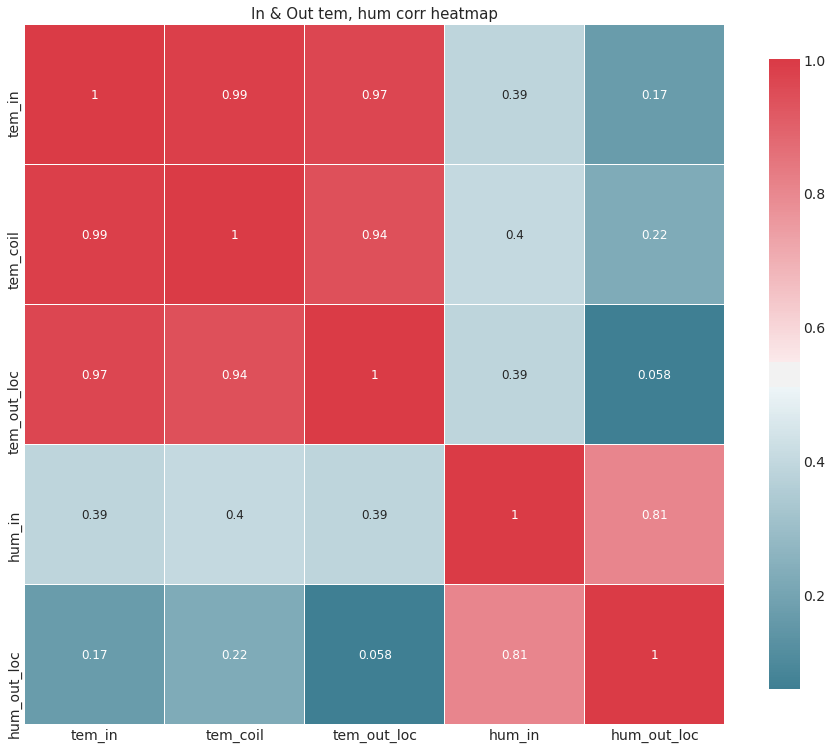

In [ ]:
#correlation heatmap of dataset
data_corr = data_plant_total.loc[:,['tem_in', 'tem_coil', 'tem_out_loc', 'hum_in', 'hum_out_loc']]

def correlation_heatmap(df):
    k , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    k = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, # 박스에 값 입력해준다.
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('In & Out tem, hum corr heatmap', y=1.05, size=15)

correlation_heatmap(data_corr)

현대제철에서 제공해준 내 외부 온도, 습도 간의 충분한 양의 상관관계가 존재하는지 파악하기 위한 상관관계 히트맵으로, 내외부 온도와 관련된 변수들끼리의 상관관계에 있어서는 각각 0.99과 0.97로 매우 강한 양의 상관관계를 보여주었다.

내외부 습도에 있어서는 0.81이라는 온도들간의 상관관계보다는 다소 약한 양의 상관관계를 보여주었으며, 추후 기상 데이터를 활용하여 내부 습도를 예측하는데 있어서 추가적인 변수나 데이터를 통한 보완이 필요해 보인다.